In [1]:
import numpy as np
import glob
from PIL import Image
import os


In [2]:
ls

1.jpg                         haar_cascade_eye.xml
b11.npy                       haar_cascade_frontal_face_default.xml
b1.npy                        images.jpg
b22.npy                       IMG_2806.JPG
b2.npy                        test_closed.jpg
data.npy                      test_open2.jpg
dataset_B_Eye_Images/         test_open3.jpg
dataset_B_Eye_Images.rar*     test_open.jpg
dataset_B_Facial_Images.rar*  Untitled.ipynb
download.jpeg                 W11.npy
download.jpg                  W1.npy
eye91.ipynb                   W22.npy
eye (copy).ipynb              W2.npy
eye.ipynb                     X_shuffled.npy
GettyImages-491743299_0.jpg   Y_shuffled.npy


In [3]:
ls dataset_B_Eye_Images/

closedLeftEyes/
closedRightEyes/
Make Money by Typing_Writing $200 to $800 a Day! SIMPLE HACK !-W1QdbEV6txQ.mp4
openLeftEyes/
openRightEyes/
reading_images_trial.ipynb


In [4]:
os.listdir()

TypeError: listdir() takes exactly 1 argument (0 given)

In [5]:
pcl = 'dataset_B_Eye_Images/closedLeftEyes/*.jpg'
pcr = 'dataset_B_Eye_Images/closedRightEyes/*.jpg'
CL = glob.glob(pcl)
CR = glob.glob(pcr)
print(len(CL), len(CR))


(1192, 1192)


In [6]:
#read closed images
CX = []
CY = [0]*2*len(CL)
for i in CL:
    CX.append(np.array(Image.open(i).convert('L')))
for i in CR:
    CX.append(np.array(Image.open(i).convert('L')))

CX = np.array(CX).reshape(np.array(CX).shape[0],-1)
CY = np.array(CY).reshape(-1,1)
CX.shape

(2384, 576)

In [7]:
pol = 'dataset_B_Eye_Images/openLeftEyes/*.jpg'
por = 'dataset_B_Eye_Images/openRightEyes/*.jpg'
OL = glob.glob(pol)
OR = glob.glob(por)
print(len(OL), len(OR))


(1231, 1231)


In [8]:
#read opened images
OX = []
OY = [1]*2*len(OL)
for i in OL:
    OX.append(np.array(Image.open(i).convert('L')))
for i in OR:
    OX.append(np.array(Image.open(i).convert('L')))

OX = np.array(OX).reshape(np.array(OX).shape[0],-1)
OY = np.array(OY).reshape(-1,1)
OX.shape


(2462, 576)

In [9]:
#join the closed and opened images
X = np.concatenate((CX,OX))
Y = np.concatenate((CY,OY))
print(X.shape, Y.shape)


((4846, 576), (4846, 1))


In [10]:
X = X/255

In [11]:
X[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [12]:
#number of training examples
m = X.shape[0]

In [13]:
class eye_nn:
    
    def layer_sizes(self, X, Y):
        n_x = X.shape[0] # size of input layer
        n_h = 4
        n_y = Y.shape[0] # size of output layer

        return (n_x, n_h, n_y)

    
    def initialize_parameters(self, n_x, n_h, n_y):
        np.random.seed(62) # we set up a seed so that your output matches ours although the initialization is random.
        W1 = np.random.randn(n_h,n_x)*0.01
        b1 = np.zeros((n_h,1))
        W2 = np.random.randn(n_y,n_h)*0.01
        b2 = np.zeros((n_y,1))
        assert (W1.shape == (n_h, n_x))
        assert (b1.shape == (n_h, 1))
        assert (W2.shape == (n_y, n_h))
        assert (b2.shape == (n_y, 1))
        self.parameters={}
        self.parameters = {"W1": W1,
                      "b1": b1,
                      "W2": W2,
                      "b2": b2}

        

    def sigmoid(self,z):
        return 1./(1.+np.exp(-z))
    def forward_propagation(self, X):
        W1 = self.parameters['W1']
        b1 = self.parameters['b1']
        W2 = self.parameters['W2']
        b2 = self.parameters['b2']
        
        Z1 = np.dot(W1,X) + b1
        A1 = np.tanh(Z1)
        Z2 = np.dot(W2,A1) + b2
        A2 = self.sigmoid(Z2)
       
        assert(A2.shape == (1, X.shape[1]))

        cache = {"Z1": Z1,
                 "A1": A1,
                 "Z2": Z2,
                 "A2": A2}

        return A2, cache
    
    def compute_cost(self,A2, Y):
        m = Y.shape[1] # number of example
        logprobs = np.add(np.multiply(np.log(A2+0.0001),Y) , np.multiply(np.log(1-A2 + 0.0001),1-Y))
        cost = -np.sum(logprobs)/m
        
        cost = np.squeeze(cost)     # makes sure cost is the dimension we expect. 
                                    # E.g., turns [[17]] into 17 
        assert(isinstance(cost, float))

        return cost
    
    def backward_propagation(self, cache, X, Y):
        m = X.shape[1]
        
        W1 = self.parameters['W1']
        W2 = self.parameters['W2']
        
        A1 = cache['A1']
        A2 = cache['A2']
       
        dZ2= np.subtract(A2,Y)
        dW2 = np.dot(dZ2,A1.T)/m
        db2 = np.sum(dZ2, axis=1, keepdims=True)/m
        dZ1 = np.multiply(np.dot(W2.T, dZ2),(1-(A1**2)))
        dW1 = np.dot(dZ1,X.T)/m
        db1 = np.sum(dZ1, axis=1, keepdims=True)/m
        
        grads = {"dW1": dW1,
                 "db1": db1,
                 "dW2": dW2,
                 "db2": db2}

        return grads
    
    def update_parameters(self,grads, learning_rate = 1.2):
        W1 = self.parameters['W1'] - (learning_rate*grads['dW1'])
        b1 = self.parameters['b1'] - (learning_rate*grads['db1'])
        W2 = self.parameters['W2'] - (learning_rate*grads['dW2'])
        b2 = self.parameters['b2'] - (learning_rate*grads['db2'])

        self.parameters = {"W1": W1,
                      "b1": b1,
                      "W2": W2,
                      "b2": b2}

    def predict(self, X):
        self.predictions = None
        A2, cache = self.forward_propagation(X)
        self.predictions = (A2 > .5)
         
    
    def train(self,X, Y, n_h, lr,num_iterations = 10000, print_cost=False):
        np.random.seed(2)
        n_x = self.layer_sizes(X, Y)[0]
        n_y = self.layer_sizes(X, Y)[2]
        self.costs=[]
        self.initialize_parameters(n_x, n_h, n_y)
        W1 = self.parameters['W1']
        b1 = self.parameters['b1']
        W2 = self.parameters['W2']
        b2 = self.parameters['b2']

        for i in range(0, num_iterations):
            A2, cache = self.forward_propagation(X)
            self.predict(X)
            cost = self.compute_cost(A2, Y)
            grads = self.backward_propagation(cache, X, Y)
            self.update_parameters(grads, learning_rate=lr)
            self.costs.append(cost)
            # Print the cost every 1000 iterations
            if print_cost and i % 100 == 0:
                print ("Cost after iteration %i: %f" %(i, cost))
            
       
        print ('Train accuracy: %d' % float((np.dot(Y,self.predictions.T) + np.dot(1-Y,1-self.predictions.T))/float(Y.size)*100) + '%')
        
    def test(self, X_test, Y_test, files):
        self.parameters['W1'] = np.load(files[0])
        self.parameters['b1'] = np.load(files[1]) 
        self.parameters['W2'] = np.load(files[2]) 
        self.parameters['b2'] = np.load(files[3]) 
        
        self.predict(X_test)
        print('prediction:',self.predictions)
        accuracy = np.sum(self.predictions == Y_test)
        print ('Test ccuracy: %d' % float((np.dot(Y_test,self.predictions.T) + np.dot(1-Y_test,1-self.predictions.T))/float(Y_test.size)*100) + '%')
        

In [14]:
X_loaded = np.load('X_shuffled.npy')



In [15]:
Y_loaded= np.load('Y_shuffled.npy')

In [16]:
X_train = np.concatenate((X_loaded[0:1944],X_loaded[2903:]))
Y_train = np.concatenate((Y_loaded[0:1944],Y_loaded[2903:]))
X_test = X_loaded[1944:2903]
Y_test = Y_loaded[1944:2903]

In [17]:
eye = eye_nn()
eye.train(X_train.T, Y_train.T, 4, 0.2, 1000, True)

Cost after iteration 0: 0.692909
Cost after iteration 100: 0.623689
Cost after iteration 200: 0.569094
Cost after iteration 300: 0.612312
Cost after iteration 400: 0.487896
Cost after iteration 500: 0.699491
Cost after iteration 600: 0.547197
Cost after iteration 700: 0.377675
Cost after iteration 800: 0.517520
Cost after iteration 900: 0.351695
Train accuracy: 75%


In [18]:
W11 = eye.parameters['W1']
W22 = eye.parameters['W2']
b11 = eye.parameters['b1']
b22 = eye.parameters['b2']
W11

array([[-0.45275887, -0.43360037, -0.40228975, ..., -0.09272065,
        -0.06151222,  0.0109754 ],
       [-0.4230649 , -0.41264655, -0.37963914, ..., -0.11490431,
        -0.07418629, -0.03258607],
       [ 0.21497425,  0.2170572 ,  0.19426887, ...,  0.08542005,
         0.06047093,  0.02820142],
       [ 0.2036766 ,  0.18449873,  0.15808619, ...,  0.0342014 ,
         0.02643626,  0.00423114]])

In [19]:
type(W11)

numpy.ndarray

In [ ]:
np.save('W11.npy', W11)


In [ ]:
np.save('W22.npy', W22)

In [ ]:
np.save('b11.npy', b11)

In [ ]:
np.save('b22.npy', b22)

In [ ]:
a = np.load('W11.npy')

In [ ]:
a

In [ ]:
files = []
fs = glob.glob('*.npy')
print(fs)
fsi = [7, 8, 9, 6]
for i in fsi:
    files.append(fs[i])
files

In [20]:
files = []
fs = glob.glob('*.npy')
print(fs)
fsi = [7, 8, 9, 6]
for i in fsi:
    files.append(fs[i])
files

['b1.npy', 'W1.npy', 'W2.npy', 'Y_shuffled.npy', 'data.npy', 'X_shuffled.npy', 'b22.npy', 'W11.npy', 'b11.npy', 'W22.npy', 'b2.npy']


['W11.npy', 'b11.npy', 'W22.npy', 'b22.npy']

In [21]:
eye.test(X_test.T, Y_test.T, files)

('prediction:', array([[False,  True, False, False, False,  True,  True, False, False,
        False,  True, False,  True, False, False,  True,  True,  True,
        False,  True,  True,  True,  True,  True,  True, False,  True,
        False,  True,  True,  True, False, False,  True,  True,  True,
        False, False,  True, False, False,  True, False, False,  True,
         True, False, False, False, False,  True, False, False, False,
        False,  True,  True,  True, False,  True, False, False, False,
        False,  True,  True, False, False, False, False,  True, False,
        False,  True,  True, False, False, False, False,  True, False,
         True,  True,  True,  True,  True,  True, False, False,  True,
        False, False,  True, False,  True, False,  True, False,  True,
         True,  True, False, False, False,  True,  True, False, False,
        False, False,  True,  True,  True, False,  True, False, False,
         True, False,  True,  True, False, False, False, Fals

In [22]:
t = np.array([[True]])

In [23]:
t is False

False

In [24]:
aa = np.array(Image.open('test_open3.jpg').convert('L'))

In [ ]:
aa.shape

In [ ]:
aa = aa.reshape(-1, 1)

In [ ]:
aa.shape

In [ ]:
aa = aa.T
aac = np.zeros((1,1))
aao = np.ones((1,1))
aal.shape
aao.shape


In [ ]:
eye.predict(aa.T)
eye.predictions

In [ ]:
eye.test(aa.T,aao, files)

In [25]:
files = []
fs = glob.glob('*.npy')
print(fs)
fsi = [7, 8, 9, 6]
for i in fsi:
    files.append(fs[i])
files

['b1.npy', 'W1.npy', 'W2.npy', 'Y_shuffled.npy', 'data.npy', 'X_shuffled.npy', 'b22.npy', 'W11.npy', 'b11.npy', 'W22.npy', 'b2.npy']


['W11.npy', 'b11.npy', 'W22.npy', 'b22.npy']

In [26]:
model = eye_nn()
model.train(X_train.T, Y_train.T, 4, 0.2, 1000, True)

Cost after iteration 0: 0.692909
Cost after iteration 100: 0.623689
Cost after iteration 200: 0.569094
Cost after iteration 300: 0.612312
Cost after iteration 400: 0.487896
Cost after iteration 500: 0.699491


KeyboardInterrupt: 

In [27]:
model.test(X_test.T, Y_test.T, files)

('prediction:', array([[False,  True, False, False, False,  True,  True, False, False,
        False,  True, False,  True, False, False,  True,  True,  True,
        False,  True,  True,  True,  True,  True,  True, False,  True,
        False,  True,  True,  True, False, False,  True,  True,  True,
        False, False,  True, False, False,  True, False, False,  True,
         True, False, False, False, False,  True, False, False, False,
        False,  True,  True,  True, False,  True, False, False, False,
        False,  True,  True, False, False, False, False,  True, False,
        False,  True,  True, False, False, False, False,  True, False,
         True,  True,  True,  True,  True,  True, False, False,  True,
        False, False,  True, False,  True, False,  True, False,  True,
         True,  True, False, False, False,  True,  True, False, False,
        False, False,  True,  True,  True, False,  True, False, False,
         True, False,  True,  True, False, False, False, Fals

In [28]:
import cv2 as cv

In [29]:
face_cascade = cv.CascadeClassifier('haar_cascade_frontal_face_default.xml')
eye_cascade = cv.CascadeClassifier('haar_cascade_eye.xml')

cap = cv.VideoCapture(0)
eyes = []
font = cv.FONT_HERSHEY_SIMPLEX
while True:
    ret, img = cap.read()
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    face = face_cascade.detectMultiScale(gray, 1.3, 5)
   
    for (fx, fy, fw, fh) in face:
        cv.rectangle(img, (fx,fy), (fx+fw, fy+fh), (0, 0, 0), 2)
        txt = cv.putText(img, "Face",(fx,fy-2), font, .65, (0,0,255), 1, cv.LINE_AA)
        roi_gray = gray[fy:fy+fh, fx:fx+fw]
        roi_color = img[fy:fy+fh, fx:fx+fw]
        
        eye_cas = eye_cascade.detectMultiScale(roi_gray)
        for (x, y, w, h) in eye_cas:
            cv.rectangle(roi_color, (x,y), (x+w, y+h), (2, 23, 255), 2)
            #eyes.append(cv.resize(roi_gray[y:y+h, x:x+w], (24,24)))
            
            temp = cv.resize(roi_gray[y:y+h, x:x+w], (24,24))
            temp = cv.cvtColor(temp, cv.COLOR_GRAY2RGB)
            temp = cv.cvtColor(temp, cv.COLOR_RGB2GRAY)
            eyes.append(temp)
            
            model.predict(temp.reshape(1,24*24).T/255) 
            if model.predictions[0][0] == True:
                predi_text = cv.putText(img, "Open eye detected",(x,y-2), font, .35, (0,255,0), 1, cv.LINE_AA)
            elif model.predictions[0][0] == False:
                predi_text = cv.putText(img, 'Closed eye detected', (x, y-2), font, .35, (0,0,255), 1, cv.LINE_AA)
    cv.imshow('eye detector', img)

    if cv.waitKey(30) & 0xFF == 27:
        break

cap.release()
cv.destroyAllWindows()

In [23]:
len(eyes)

563

In [23]:
for ey in eyes:
    cv.imshow('eye cropped_out', ey)
    cv.waitKey(0)
    cv.destroyAllWindows()

In [24]:
eyes[0].reshape(1,-1).shape

(1, 576)

In [53]:
model.predict(eyes[26].reshape(1,-1).T)

In [54]:
(model.predictions[0][0] == True) 

True

In [29]:
cv.imshow('eye cropped_out', eyes[47])
cv.waitKey(0)
cv.destroyAllWindows()

In [27]:
for ii in eyes:
    model.predict(ii.reshape(1,-1).T/255)
    print(model.predictions[0][0] == True)

False
False
False
False
False
True
False
False
False
True
False
False
False
False
True
False
True
True
True
False
True
False
False
False
True
False
True
False
False
False
False
True
True
True
False
False
True
False
False
False
False
False
True
True
True
False
True
True
True
False
True
True
False
False
False
True
True
True
True
False
False
False
False
False
False
False
True
False
False
False
False
False
False
True
False
True
True
False
False
False
False
True
True
True
True
False
False
True
False
False
True
True
False
False
False
False
False
True
False
False
False
False
True
True
True
False
True
False
False
False
False
True
False
False
False
False
False
True
True
False
True
False
False
True
False
False
False
False
False
True
False
False
True
True
False
False
True
True
False
False
False
False
False
False
False
False
False
True
False
True
False


In [24]:
import matplotlib.pyplot as plt

In [25]:
%matplotlib inline

In [33]:
eyes_gray = []
for ee in eyes:
    e = cv.cvtColor(ee, cv.COLOR_GRAY2RGB)
    eyes_gray.append(e)


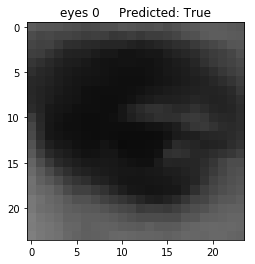

In [36]:
plt.imshow(eyes_gray[-12])
model.predict(eyes[-12].reshape(1,-1).T/255)
plt.title('eyes {}     Predicted: {}'.format(0, model.predictions[0][0]))
plt.show()


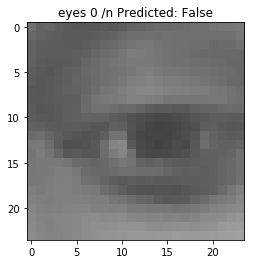

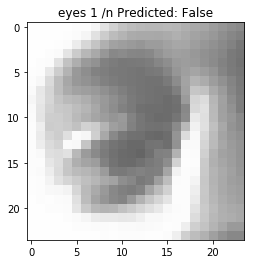

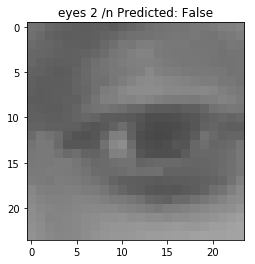

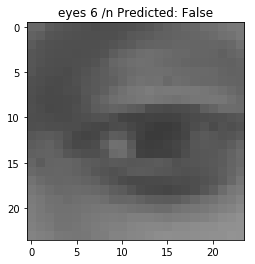

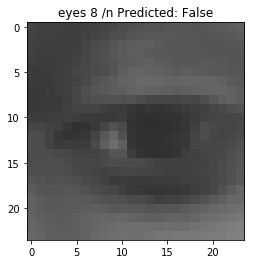

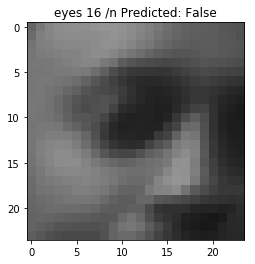

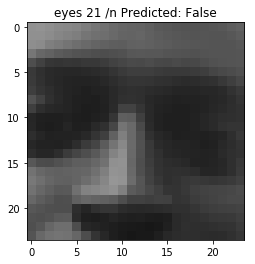

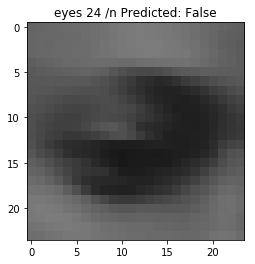

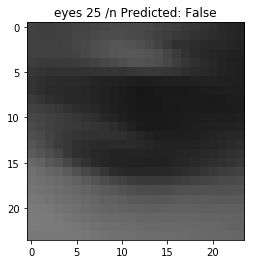

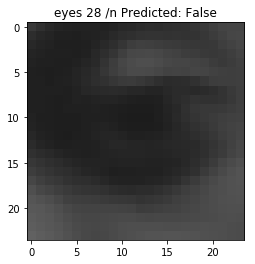

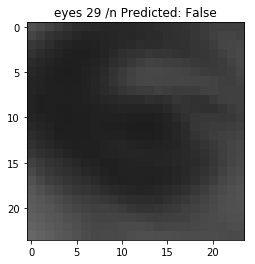

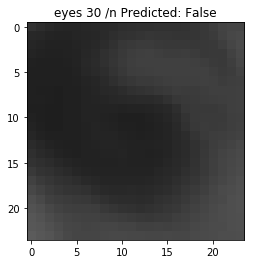

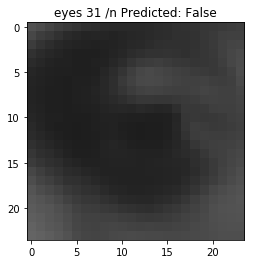

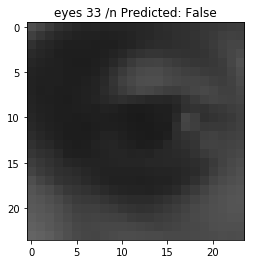

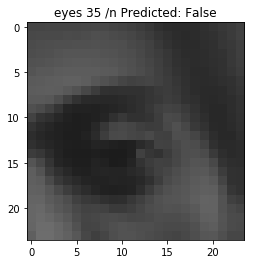

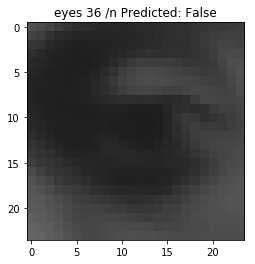

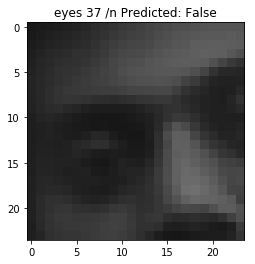

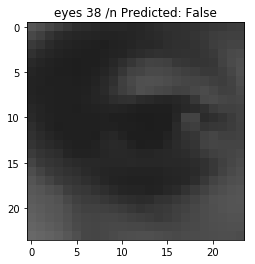

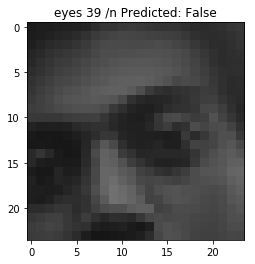

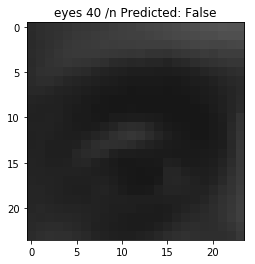

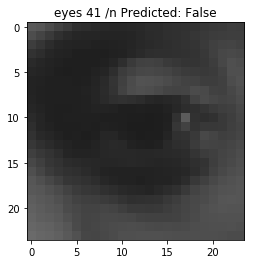

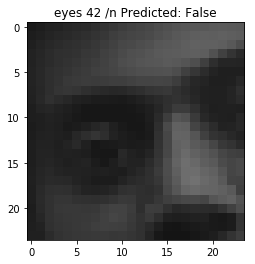

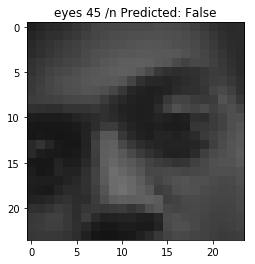

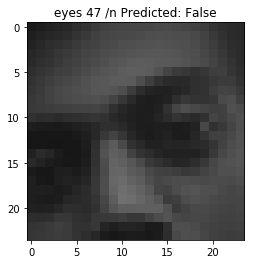

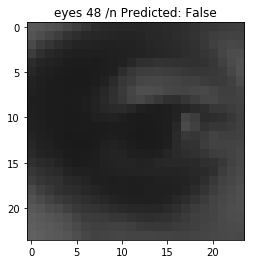

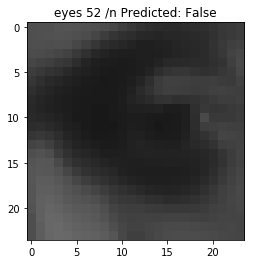

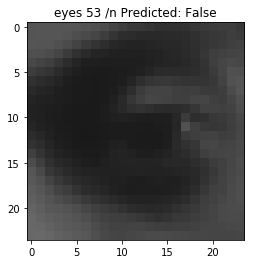

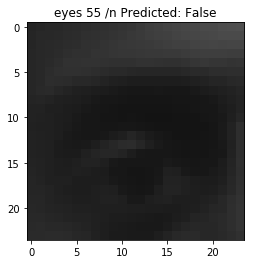

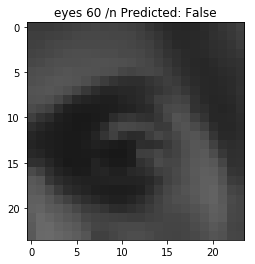

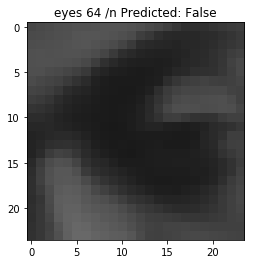

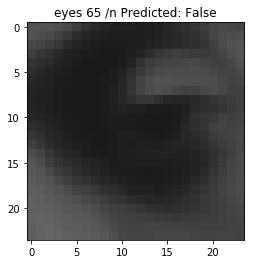

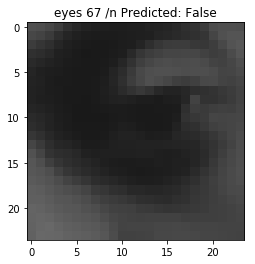

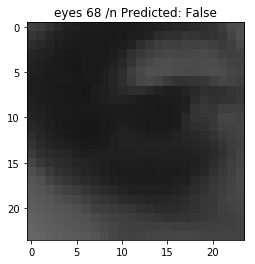

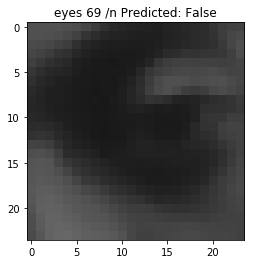

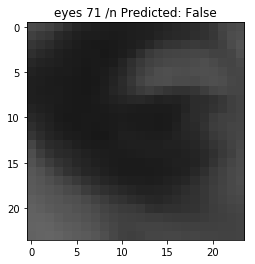

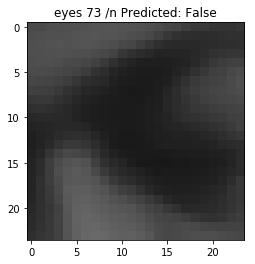

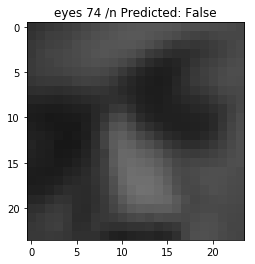

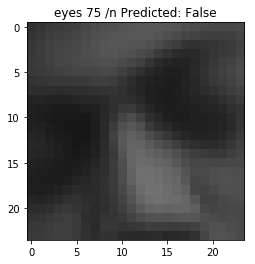

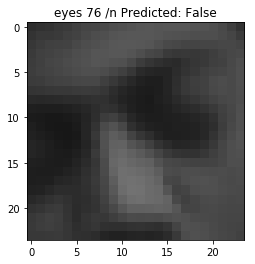

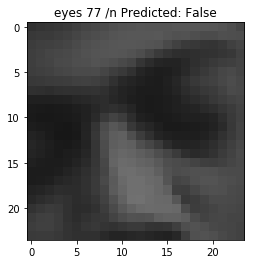

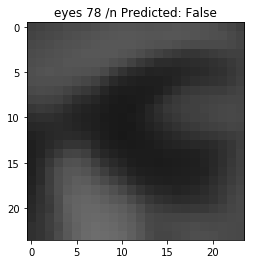

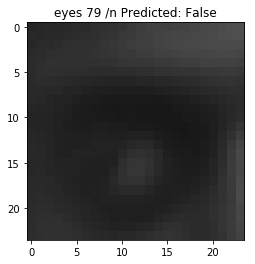

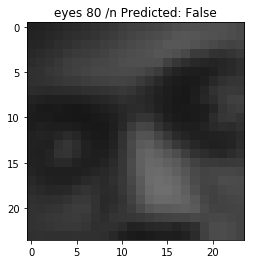

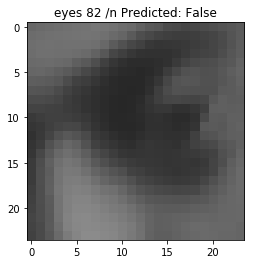

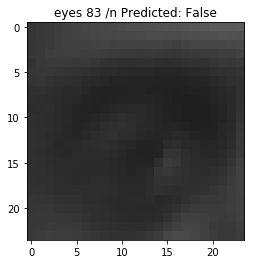

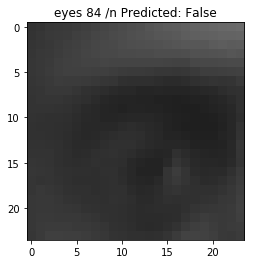

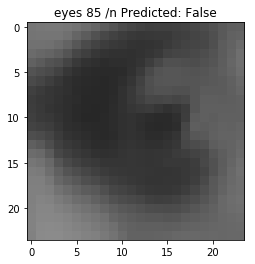

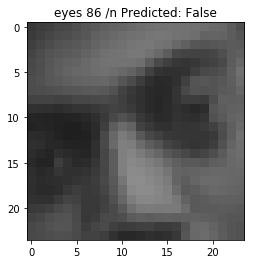

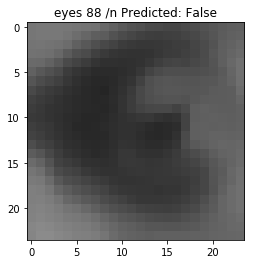

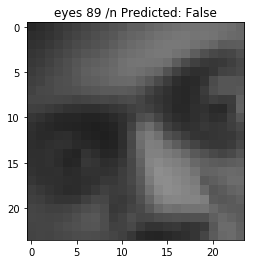

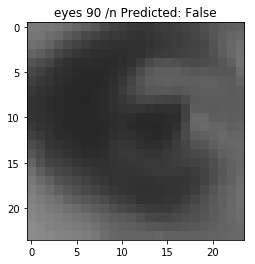

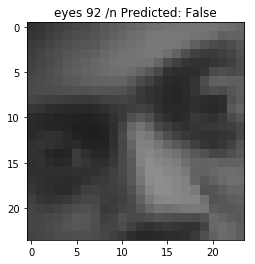

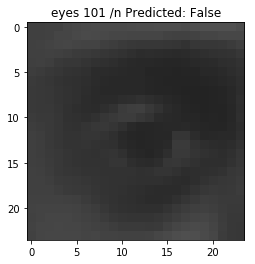

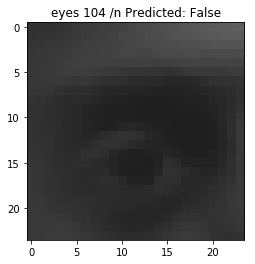

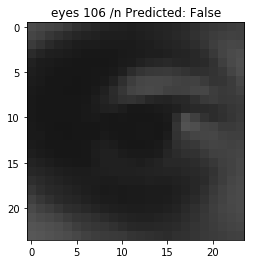

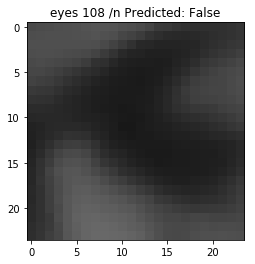

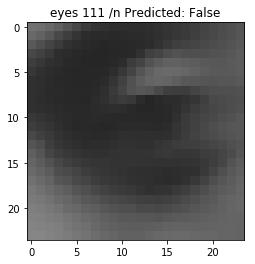

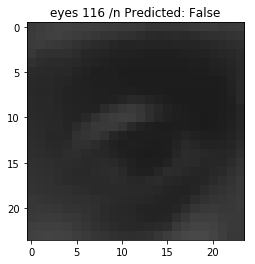

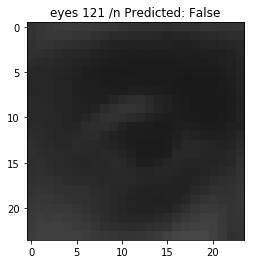

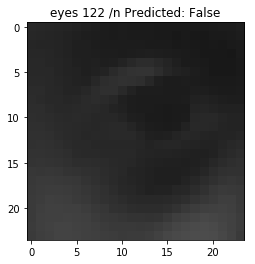

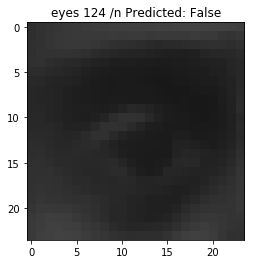

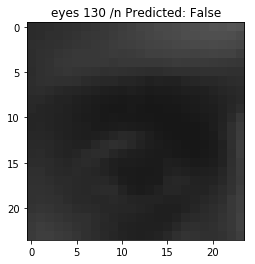

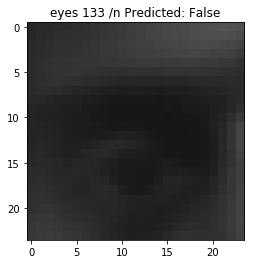

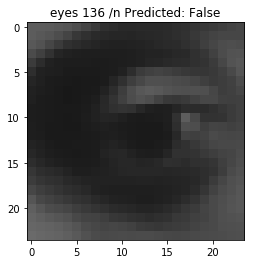

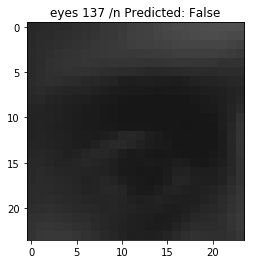

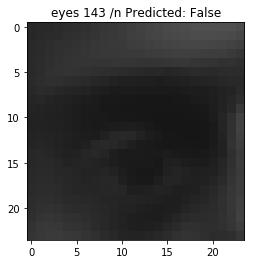

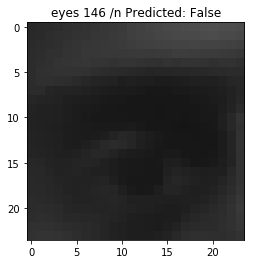

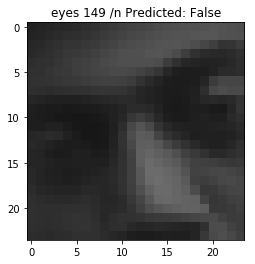

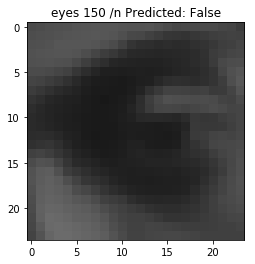

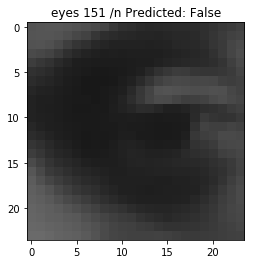

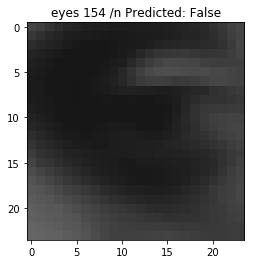

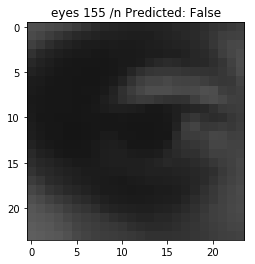

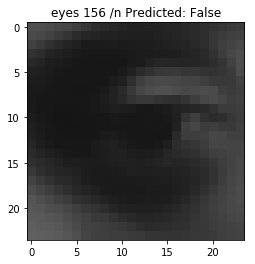

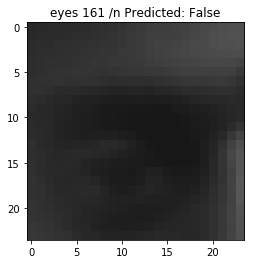

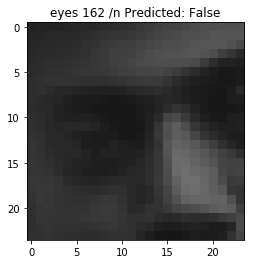

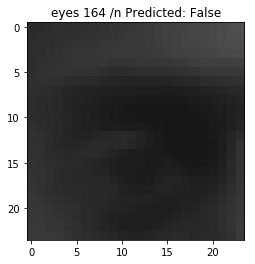

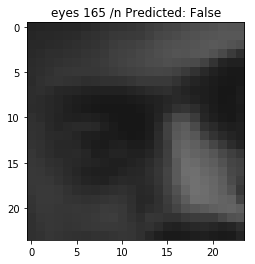

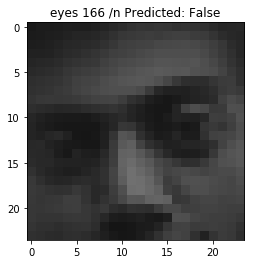

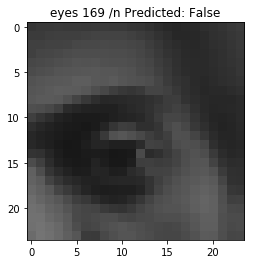

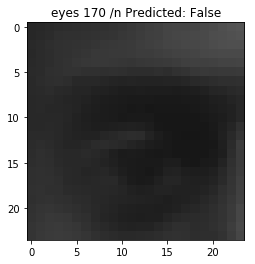

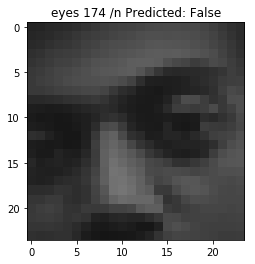

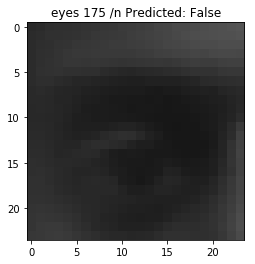

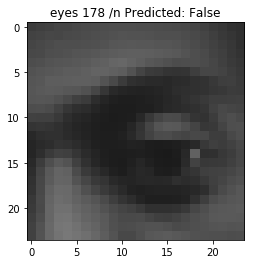

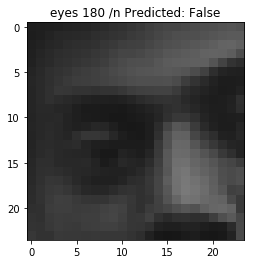

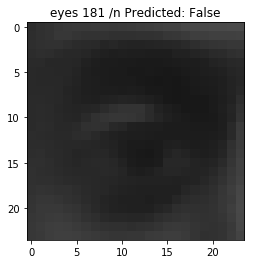

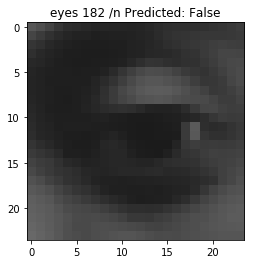

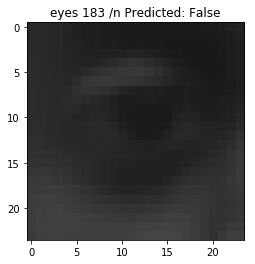

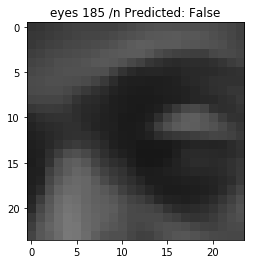

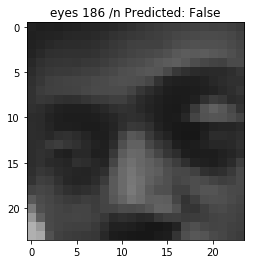

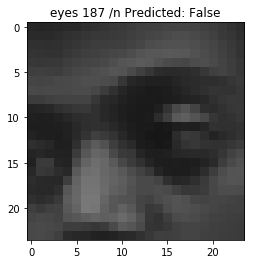

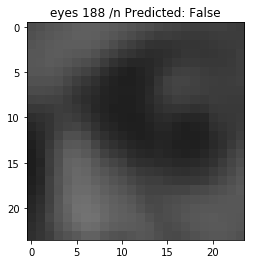

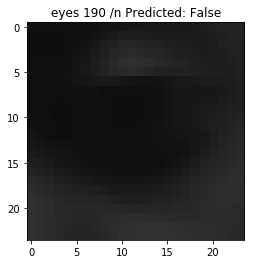

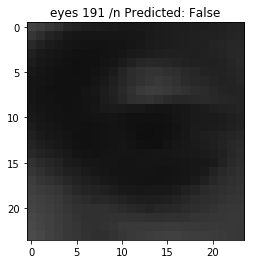

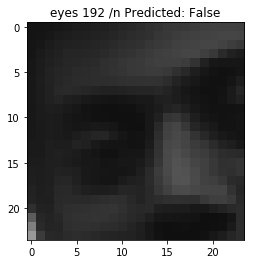

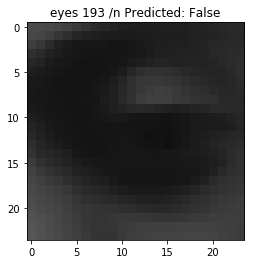

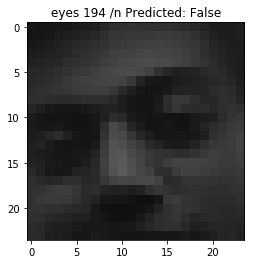

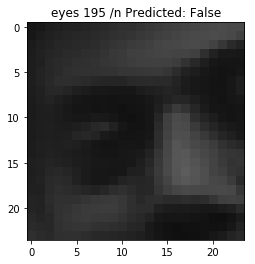

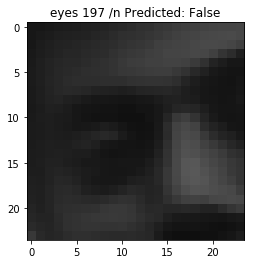

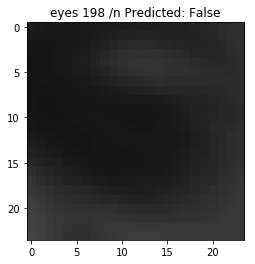

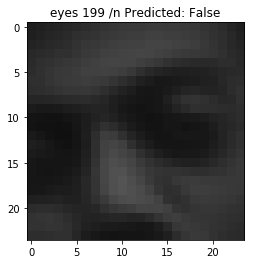

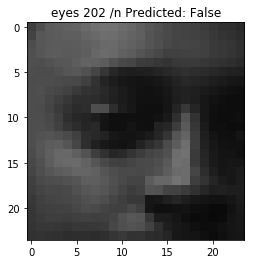

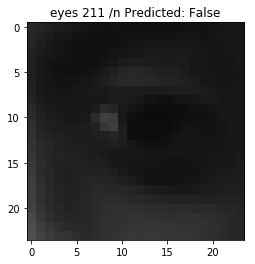

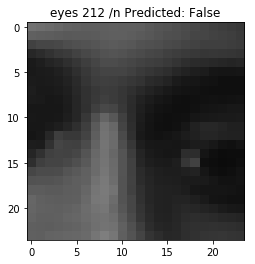

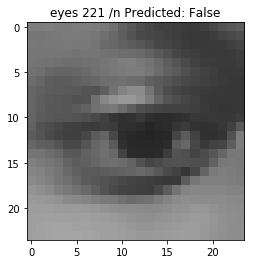

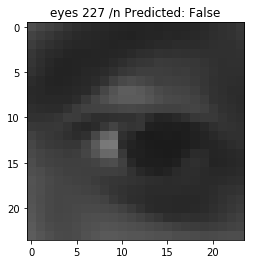

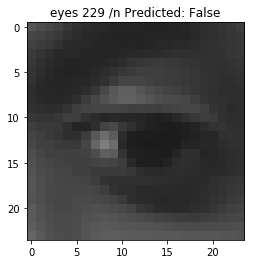

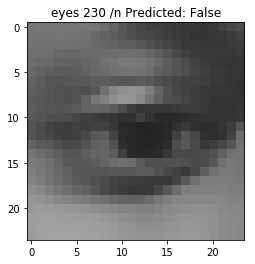

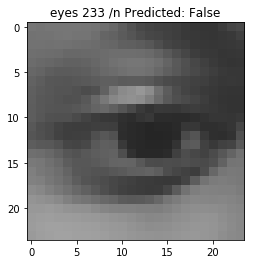

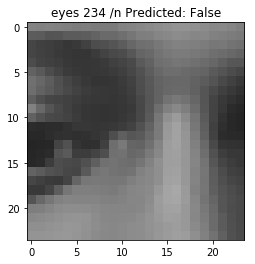

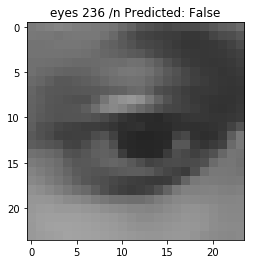

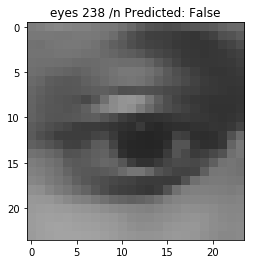

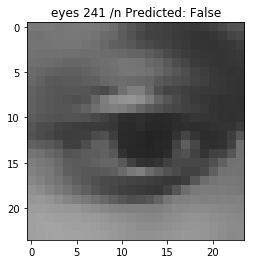

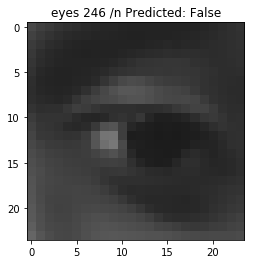

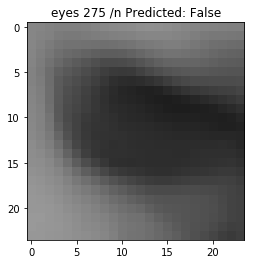

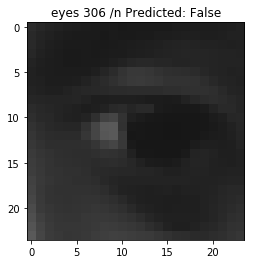

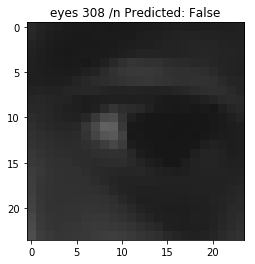

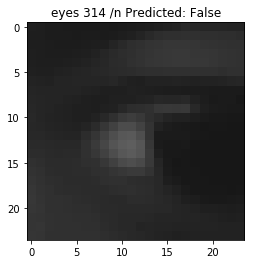

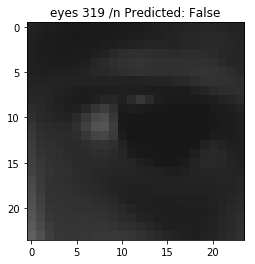

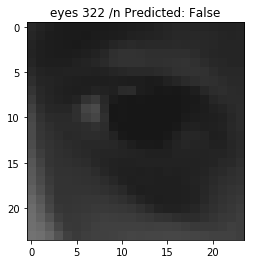

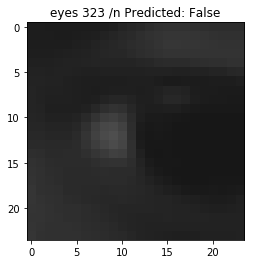

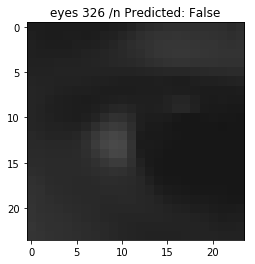

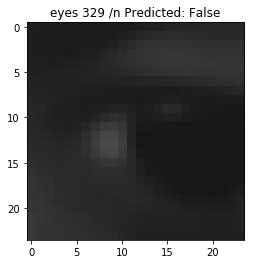

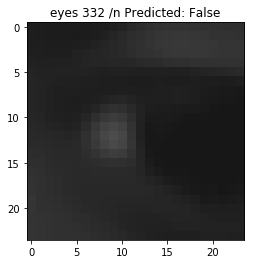

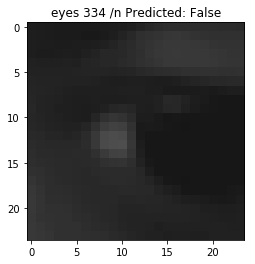

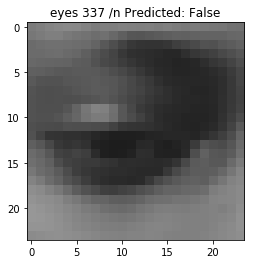

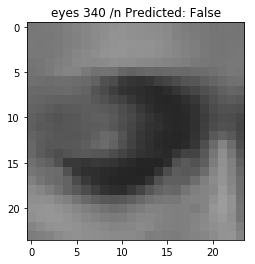

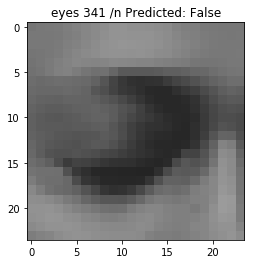

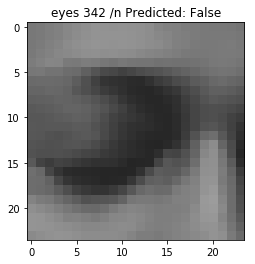

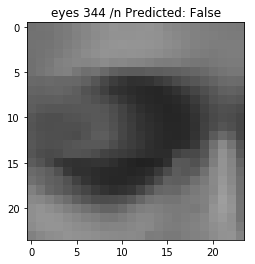

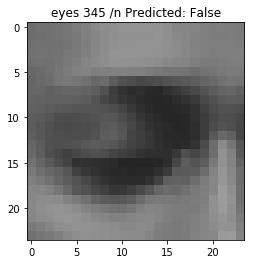

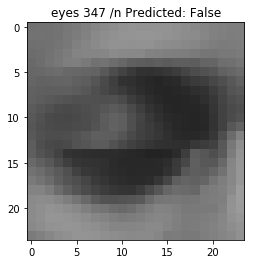

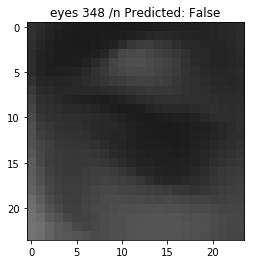

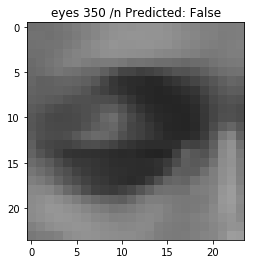

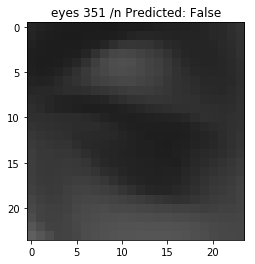

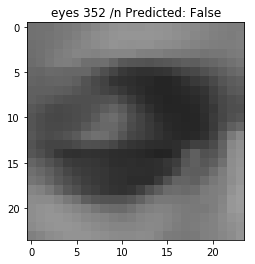

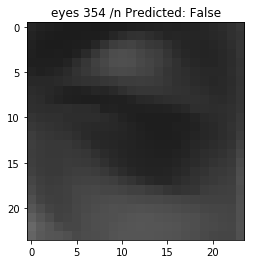

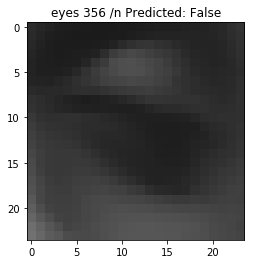

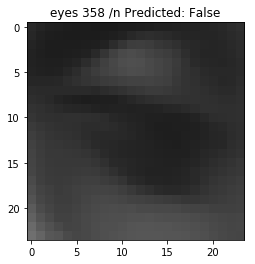

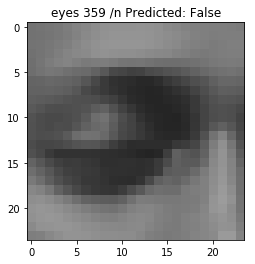

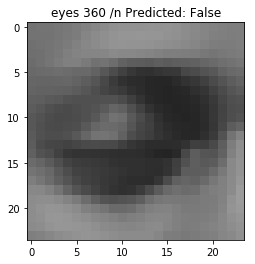

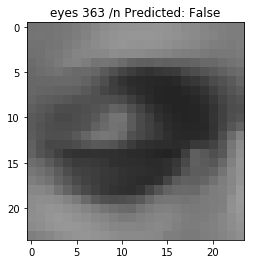

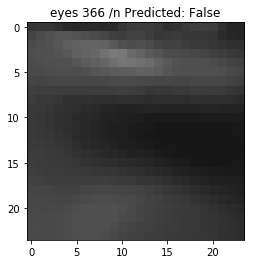

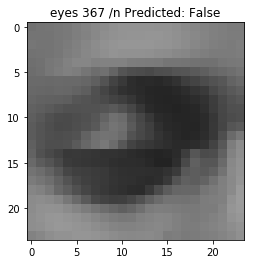

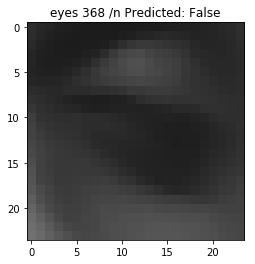

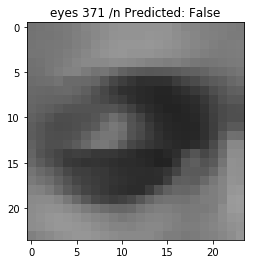

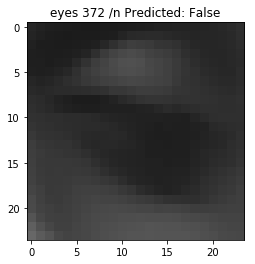

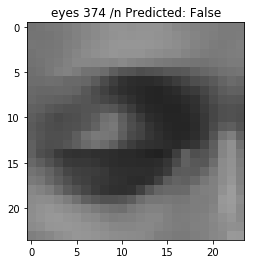

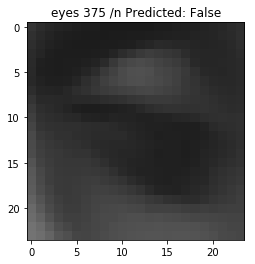

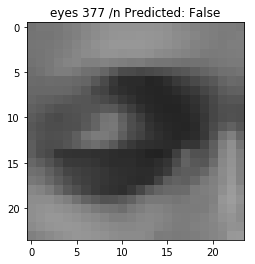

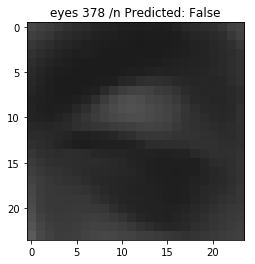

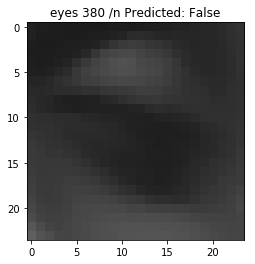

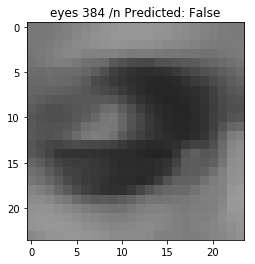

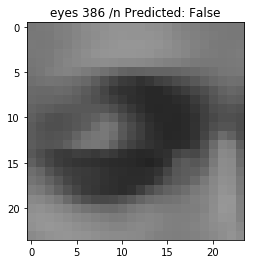

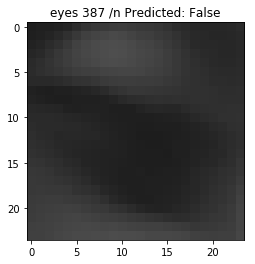

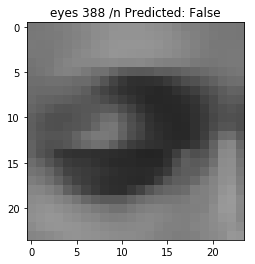

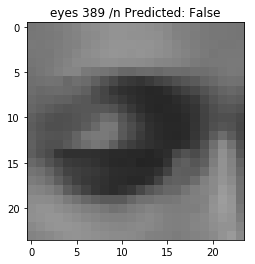

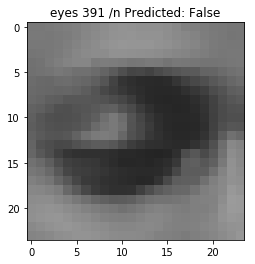

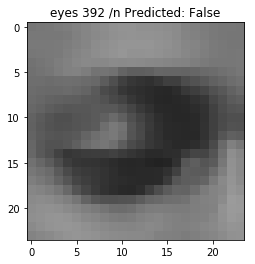

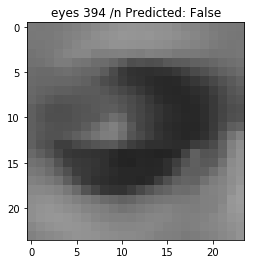

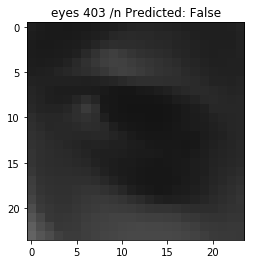

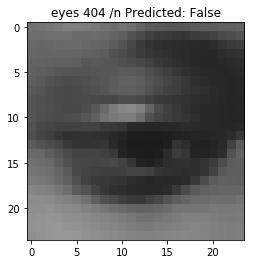

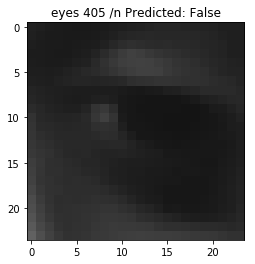

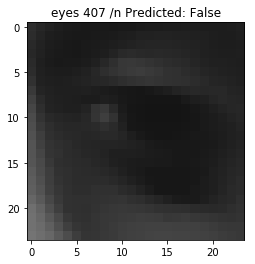

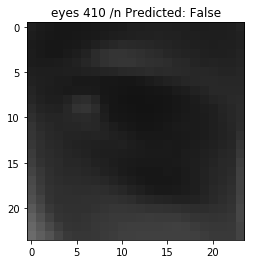

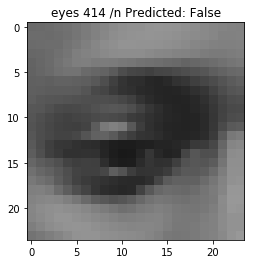

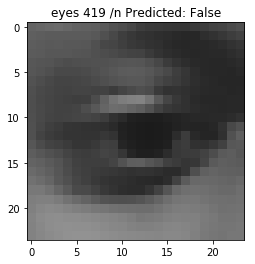

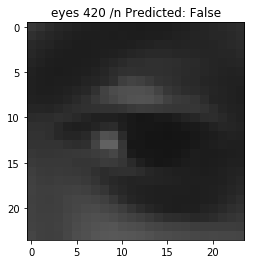

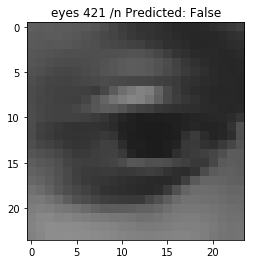

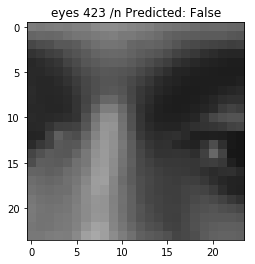

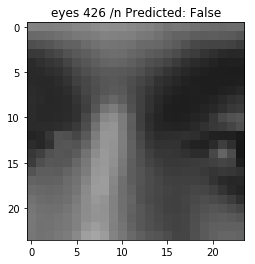

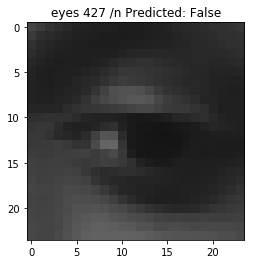

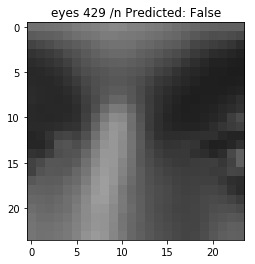

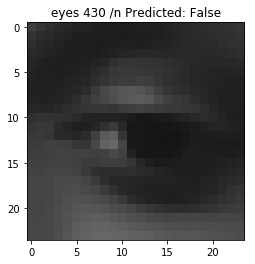

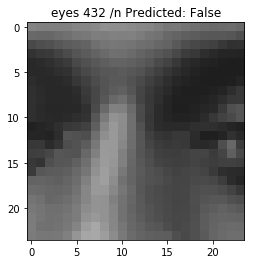

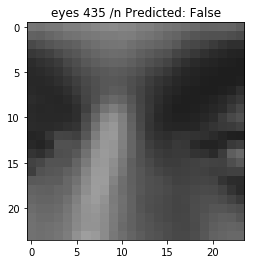

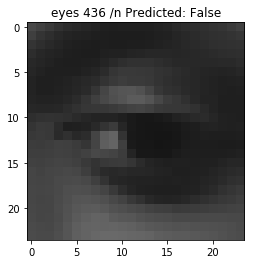

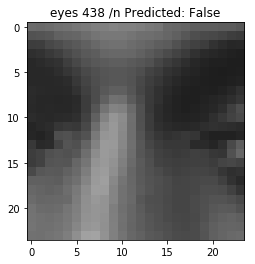

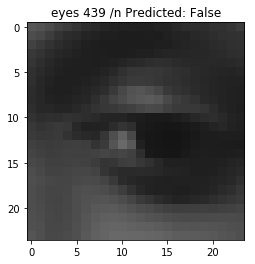

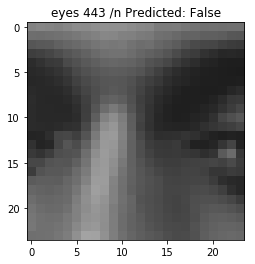

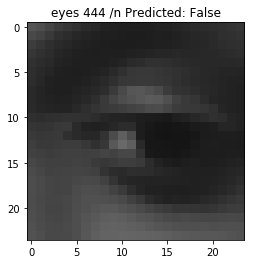

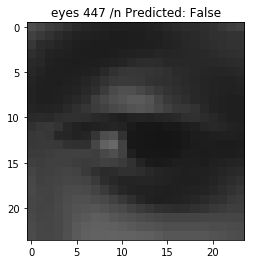

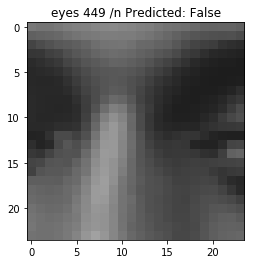

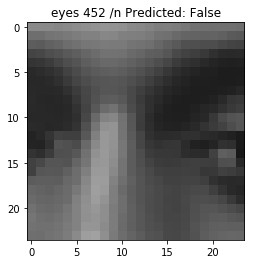

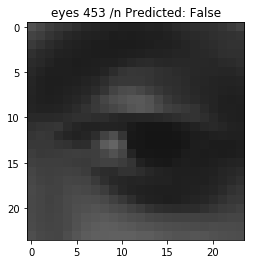

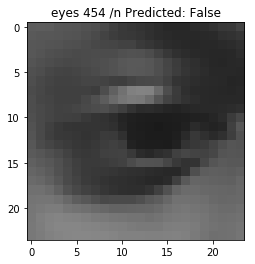

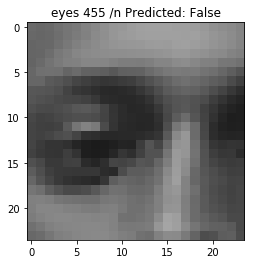

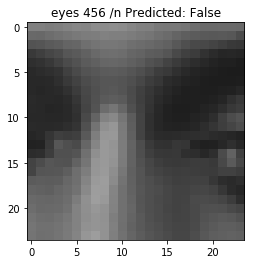

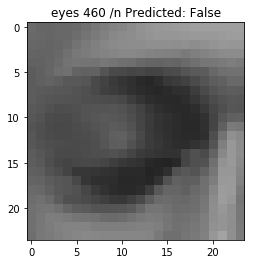

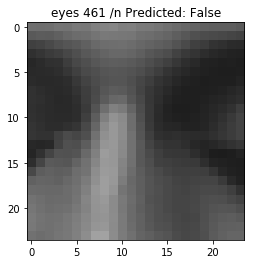

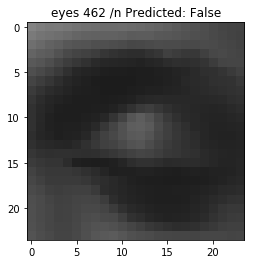

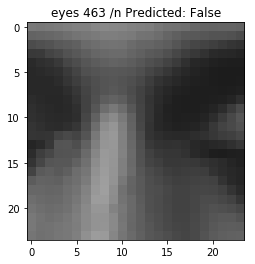

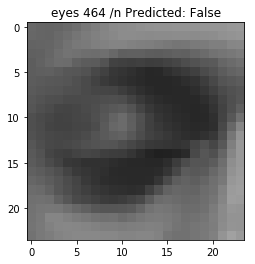

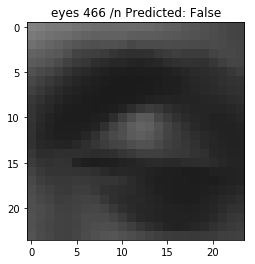

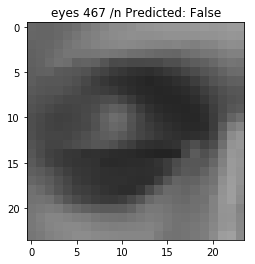

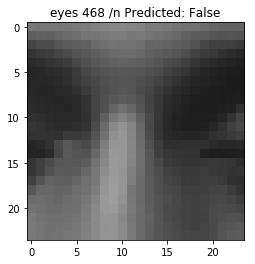

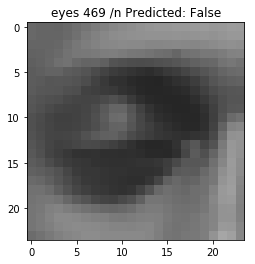

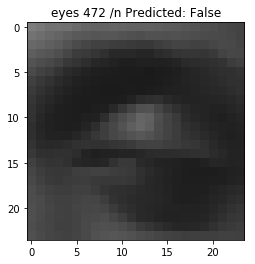

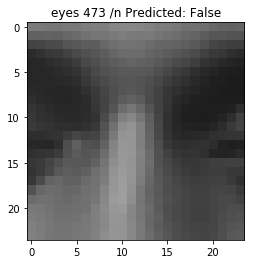

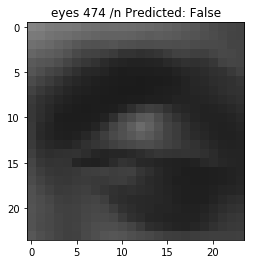

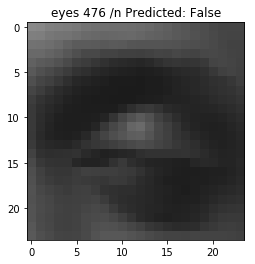

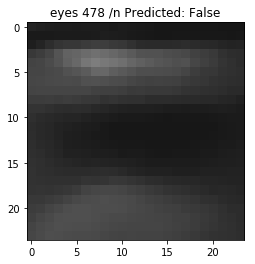

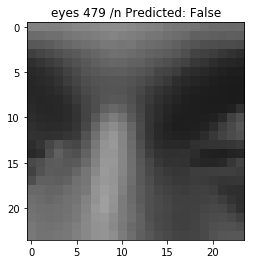

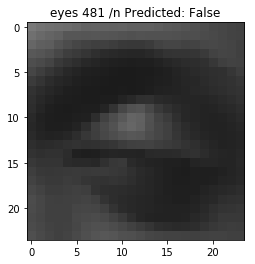

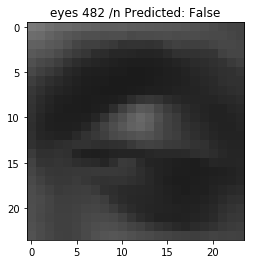

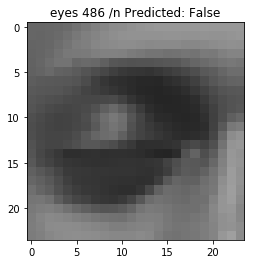

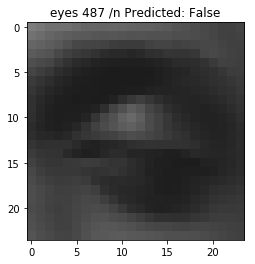

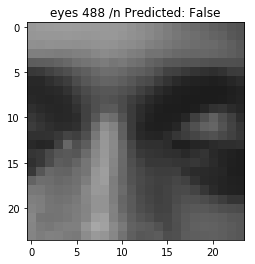

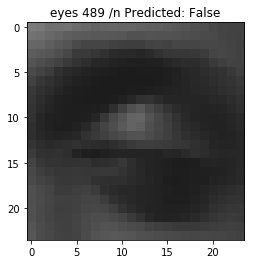

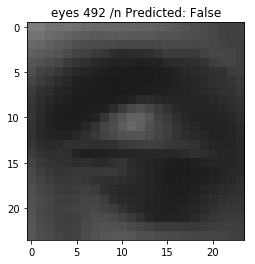

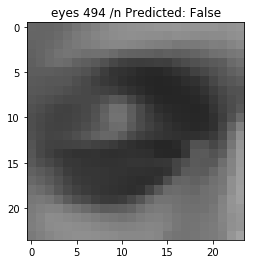

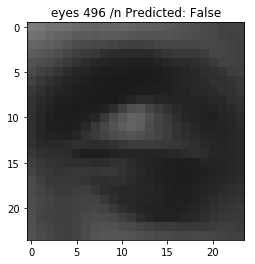

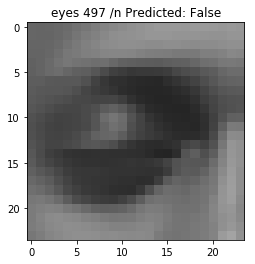

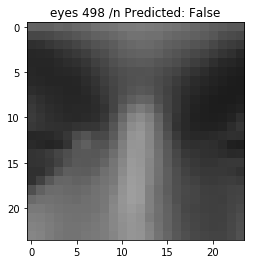

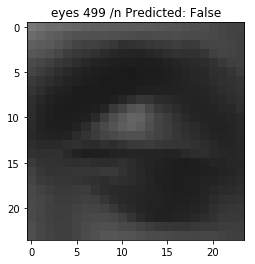

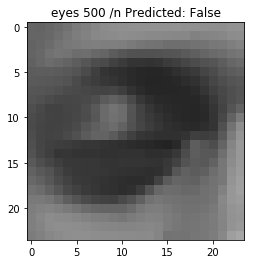

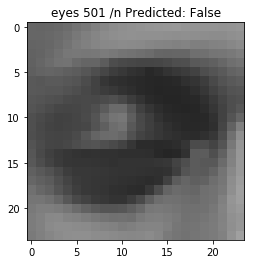

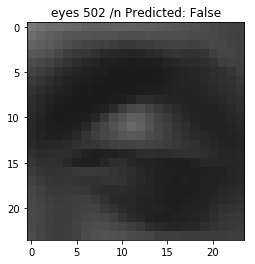

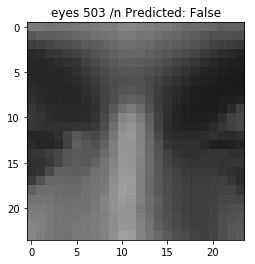

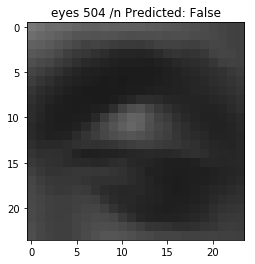

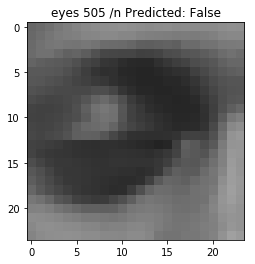

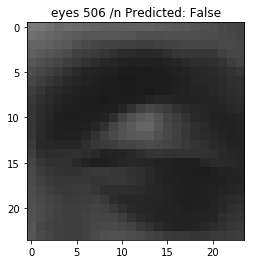

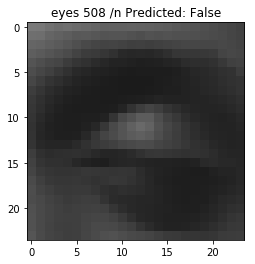

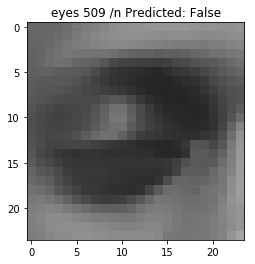

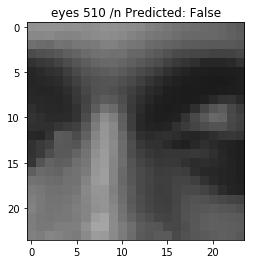

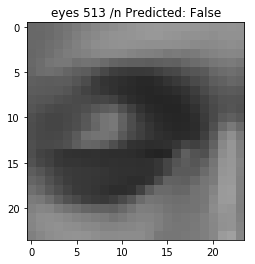

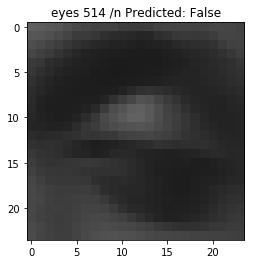

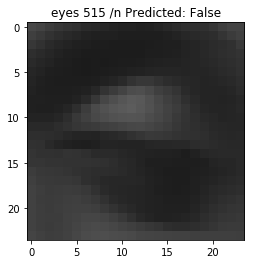

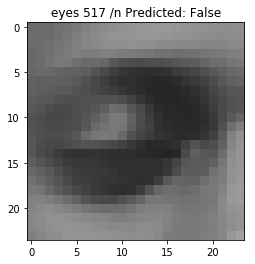

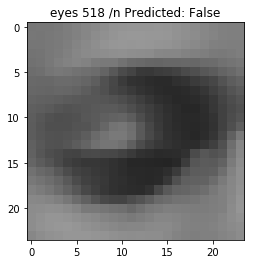

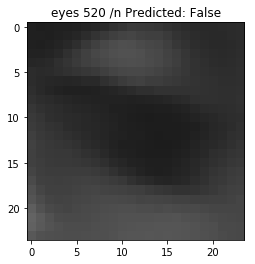

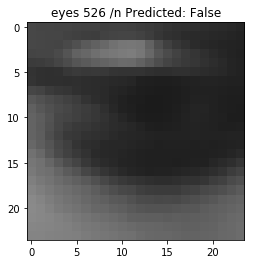

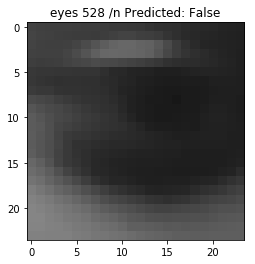

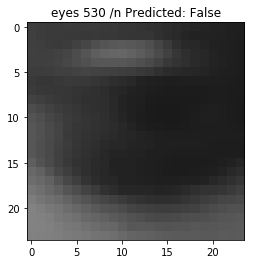

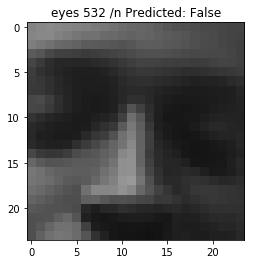

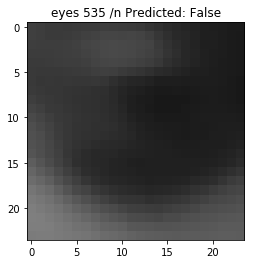

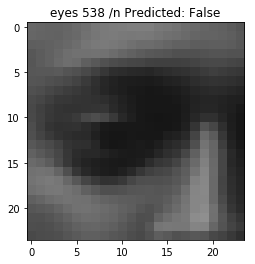

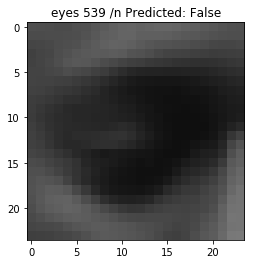

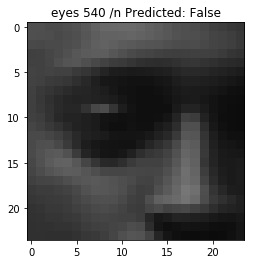

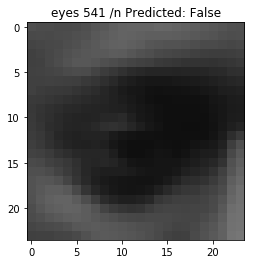

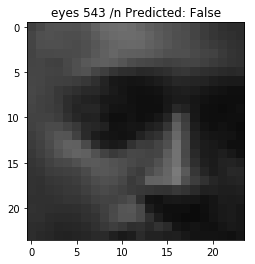

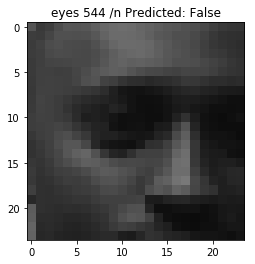

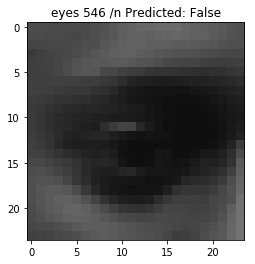

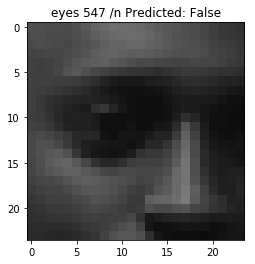

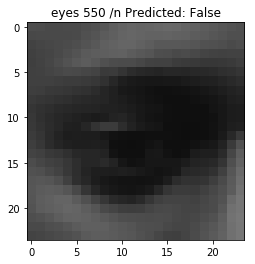

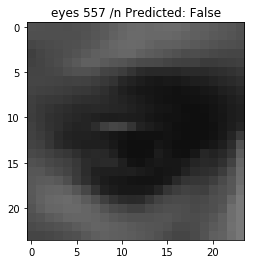

In [27]:
o = 0
for i in eyes:
    show = cv.cvtColor(i, cv.COLOR_GRAY2RGB)
    model.predict(i.reshape(1,-1).T/255)
    if model.predictions[0][0] == False:
        plt.title('eyes {} /n Predicted: {}'.format(o, model.predictions[0][0]))
        plt.imshow(show)
        plt.show()
    o+=1

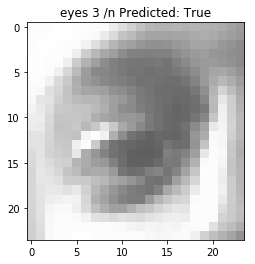

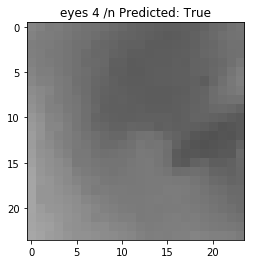

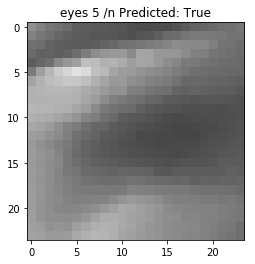

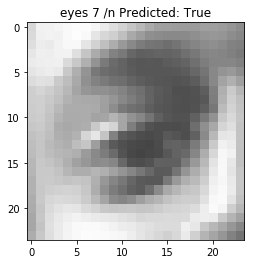

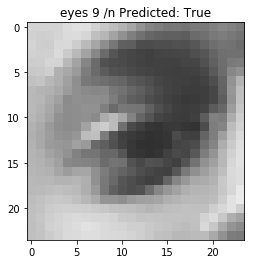

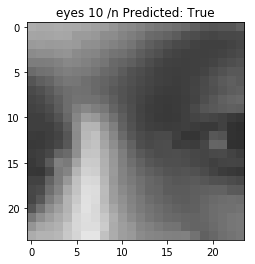

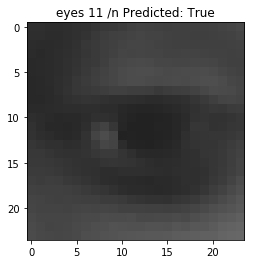

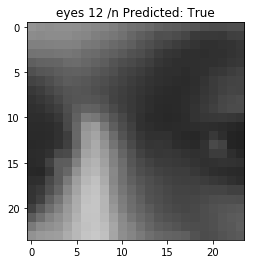

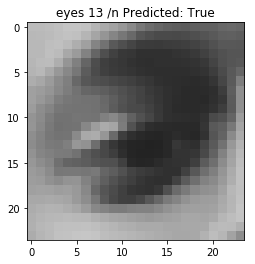

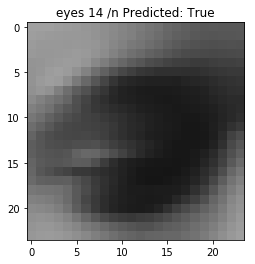

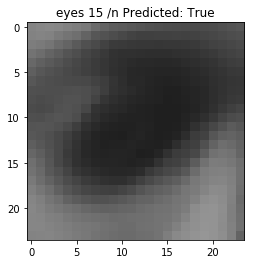

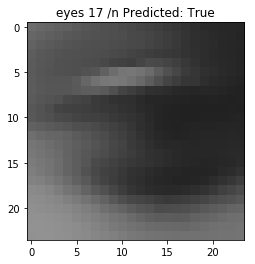

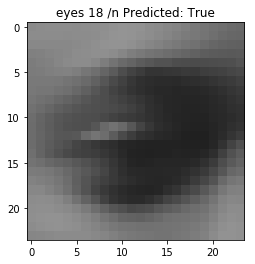

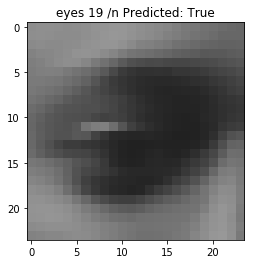

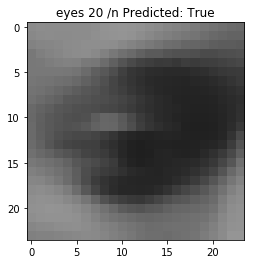

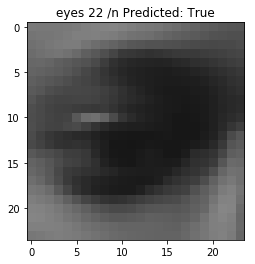

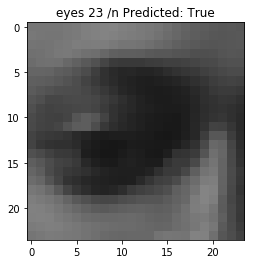

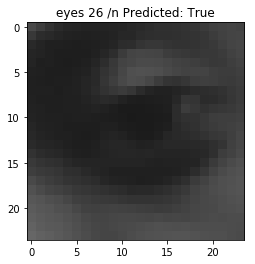

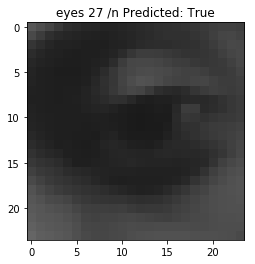

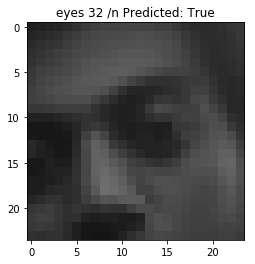

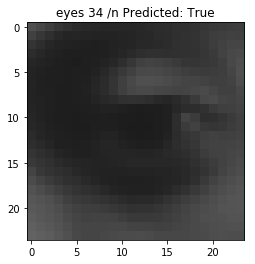

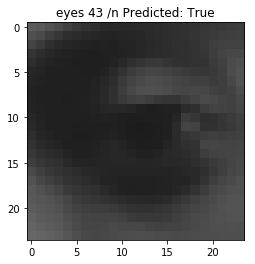

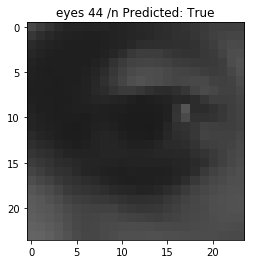

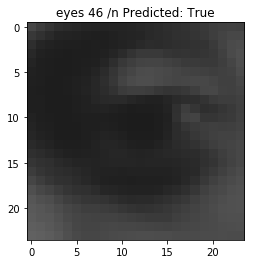

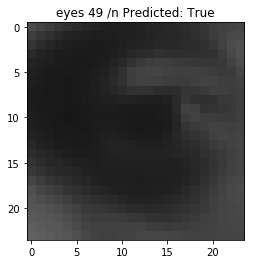

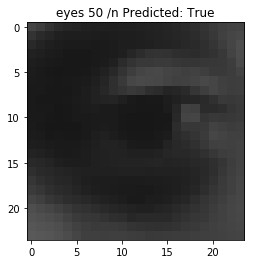

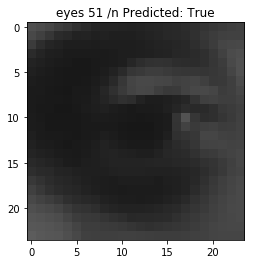

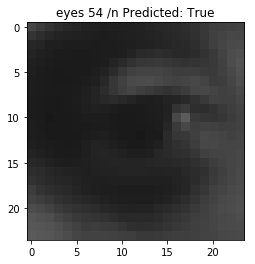

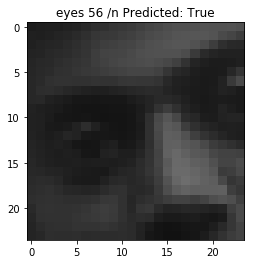

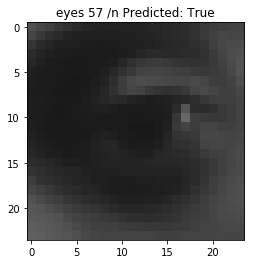

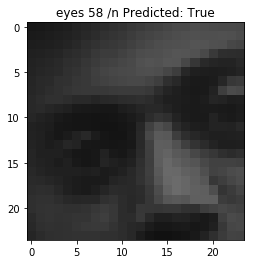

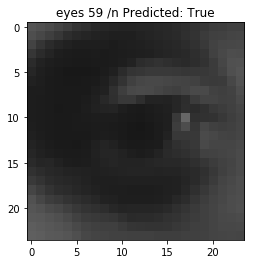

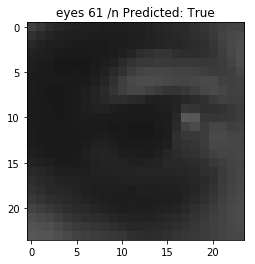

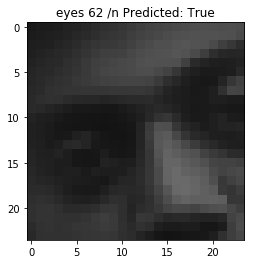

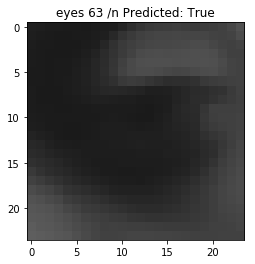

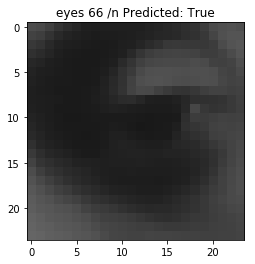

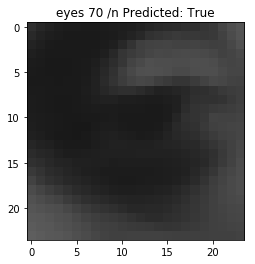

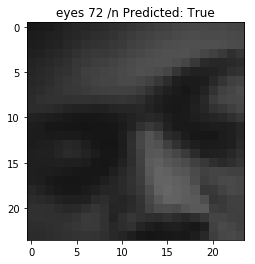

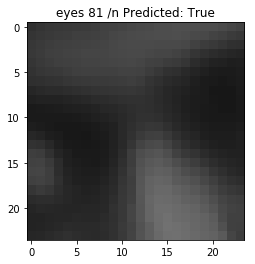

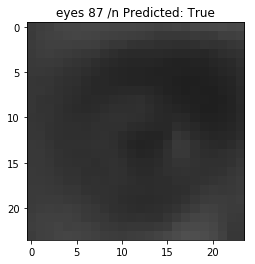

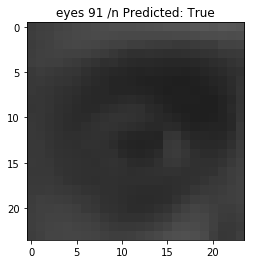

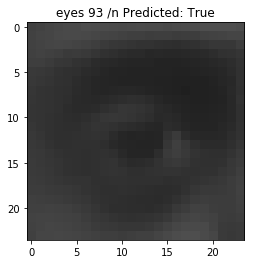

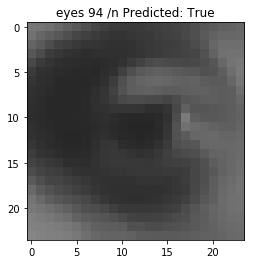

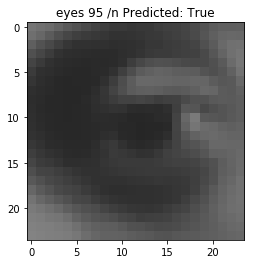

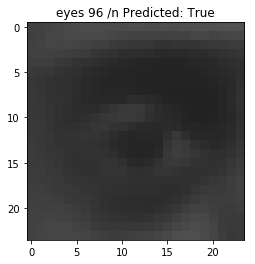

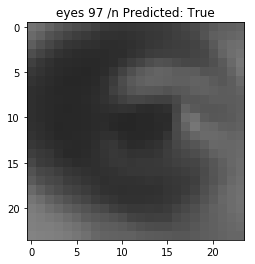

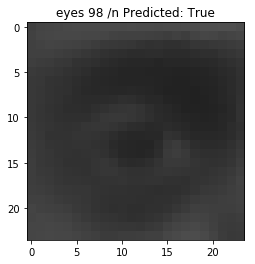

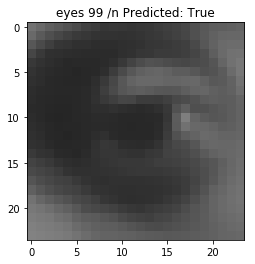

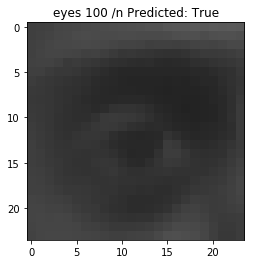

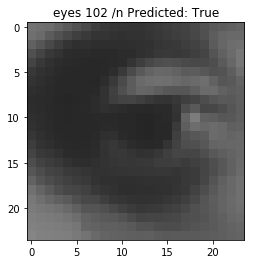

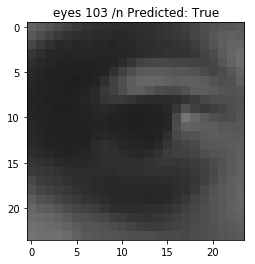

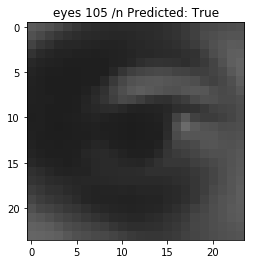

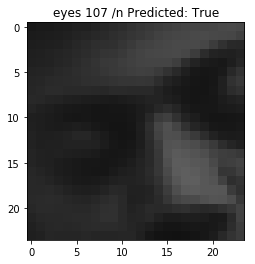

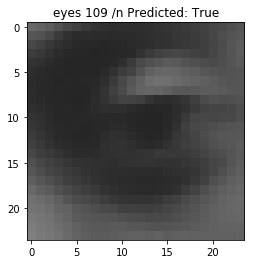

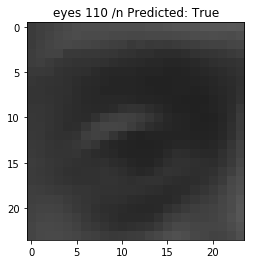

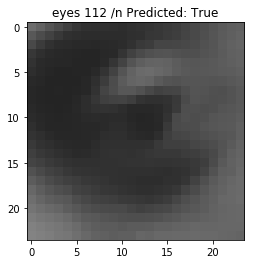

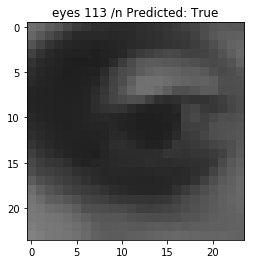

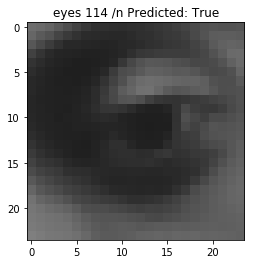

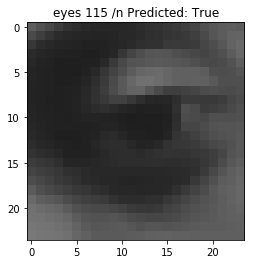

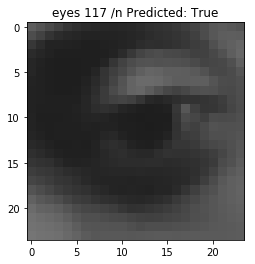

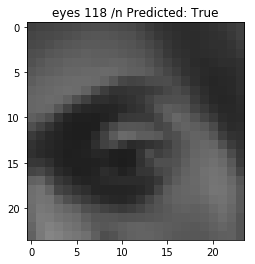

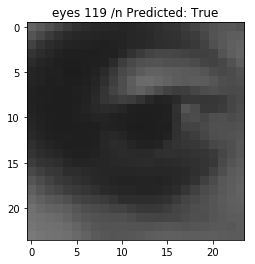

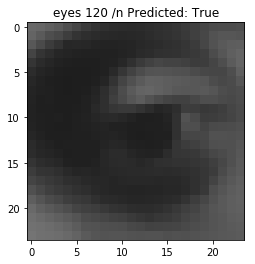

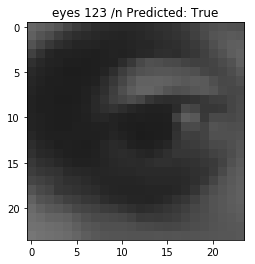

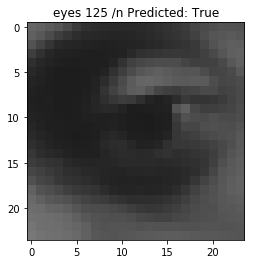

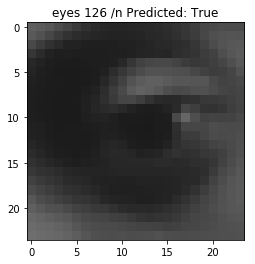

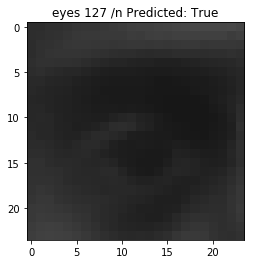

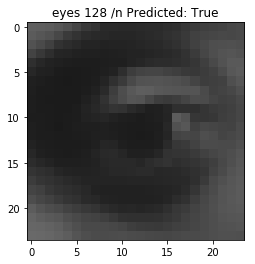

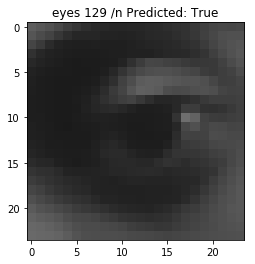

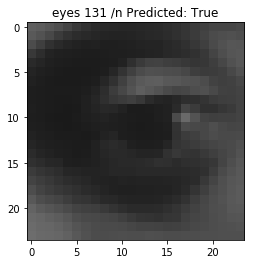

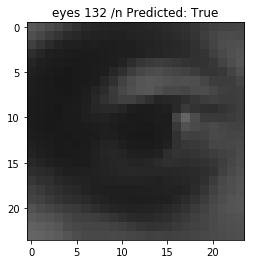

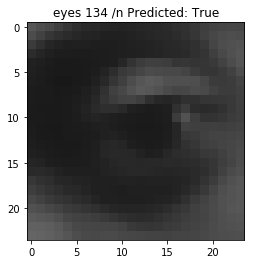

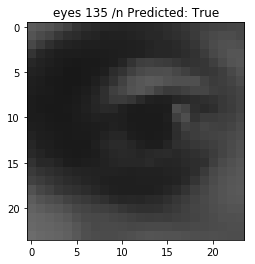

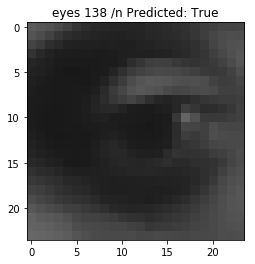

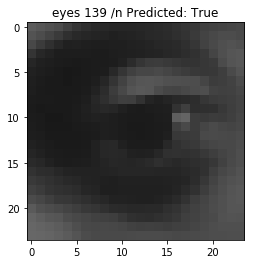

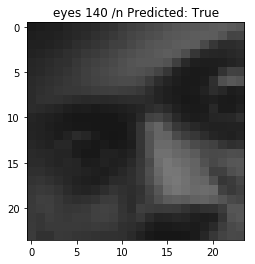

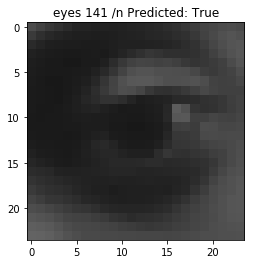

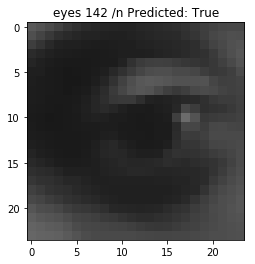

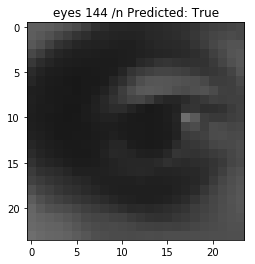

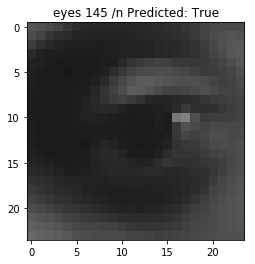

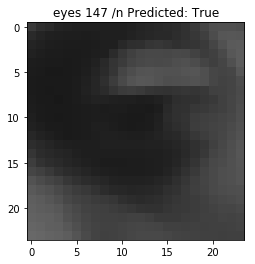

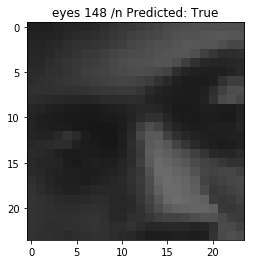

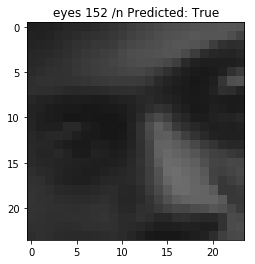

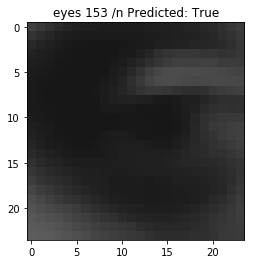

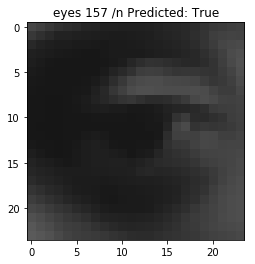

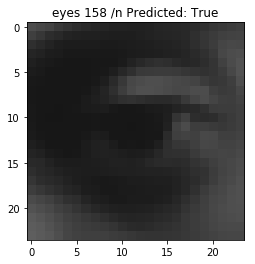

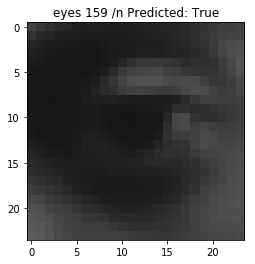

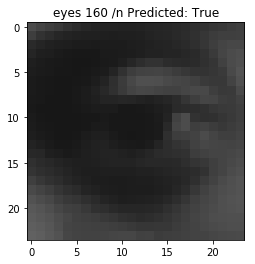

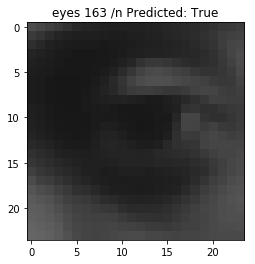

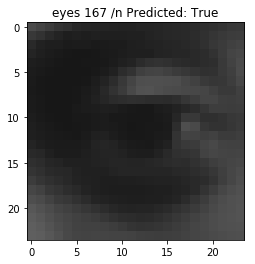

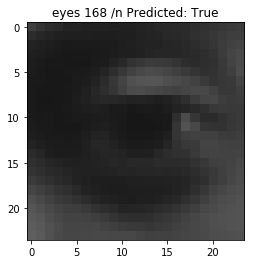

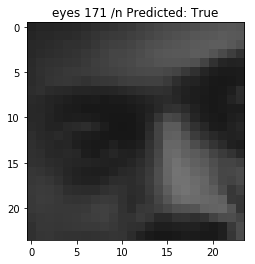

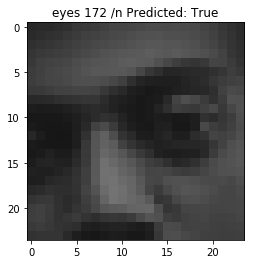

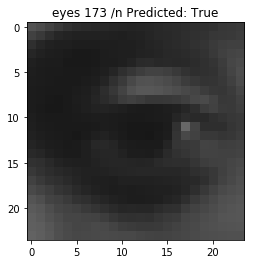

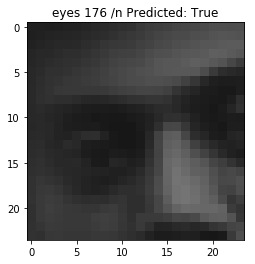

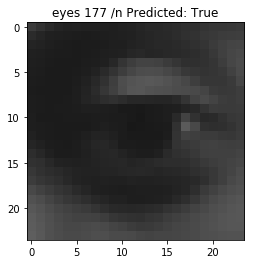

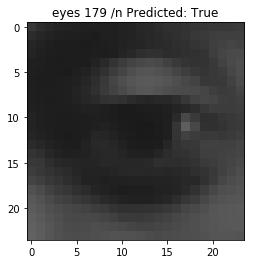

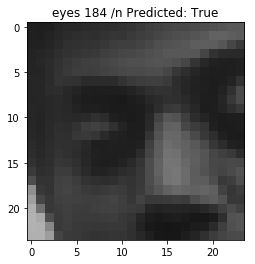

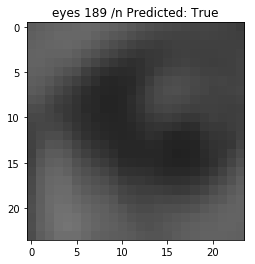

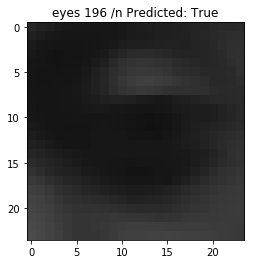

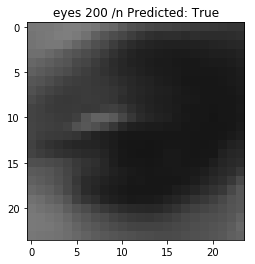

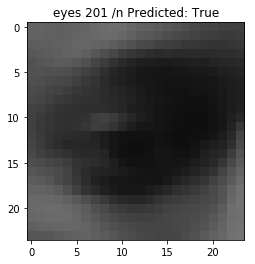

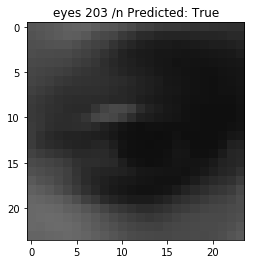

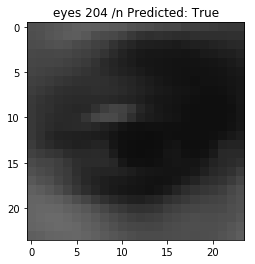

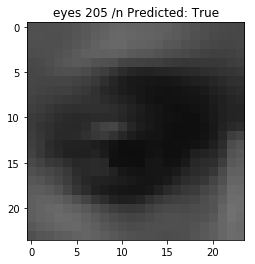

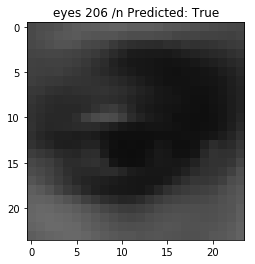

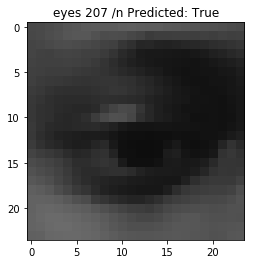

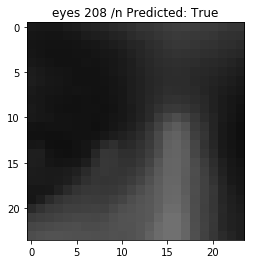

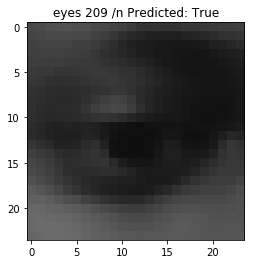

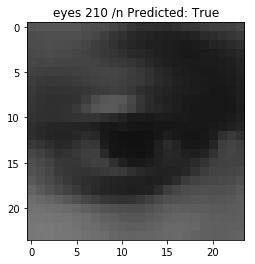

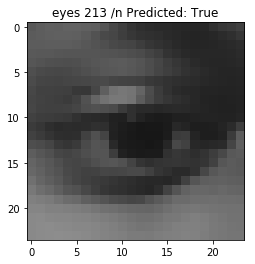

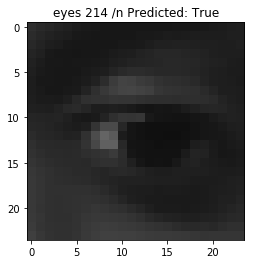

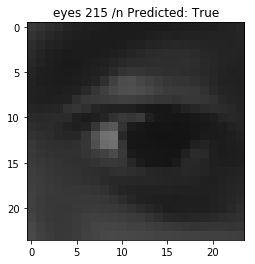

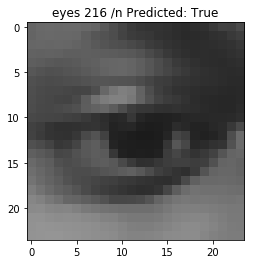

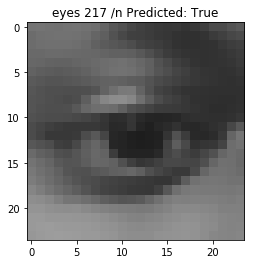

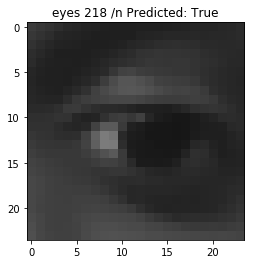

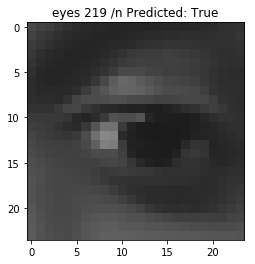

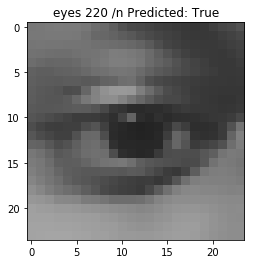

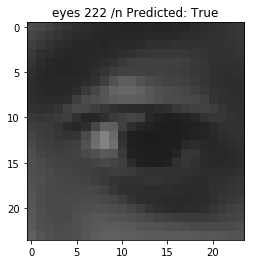

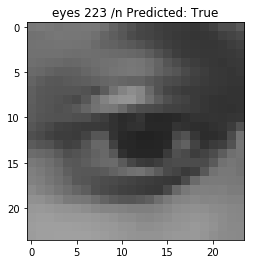

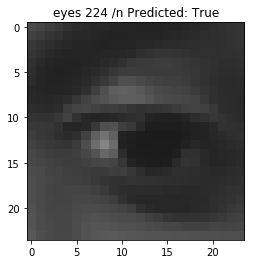

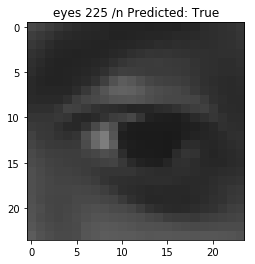

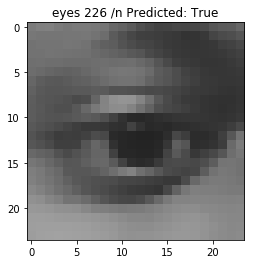

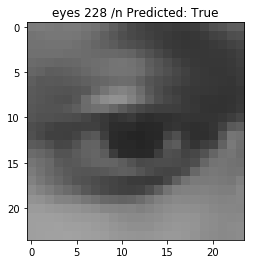

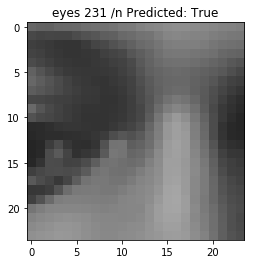

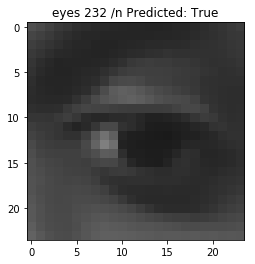

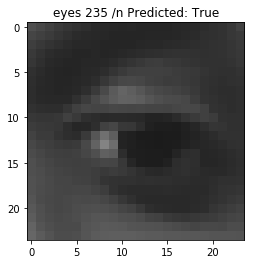

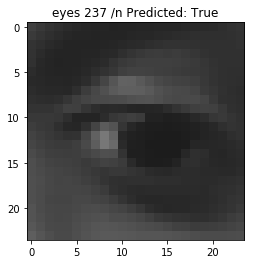

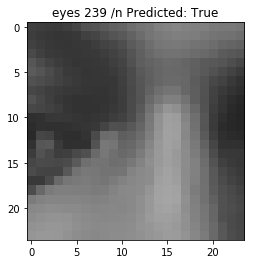

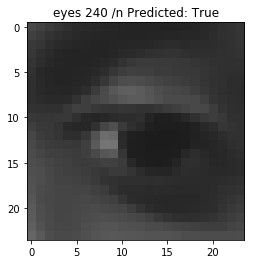

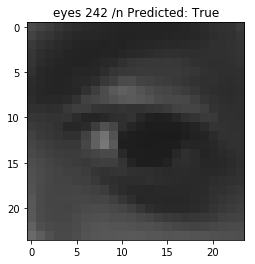

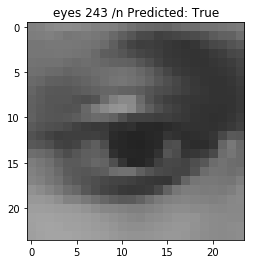

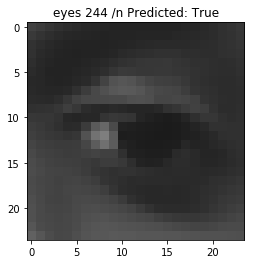

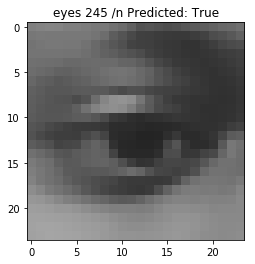

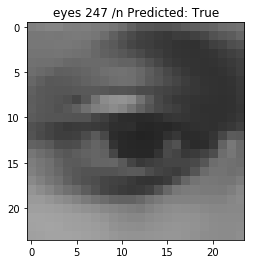

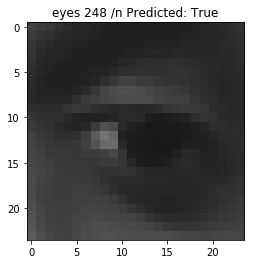

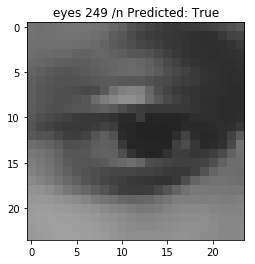

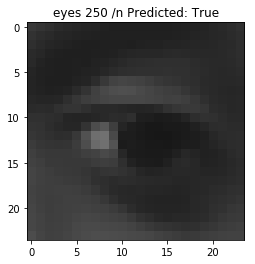

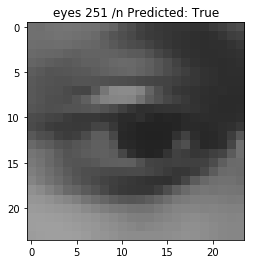

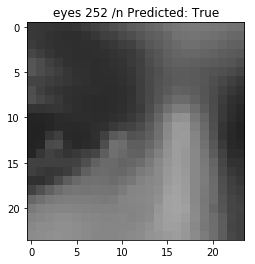

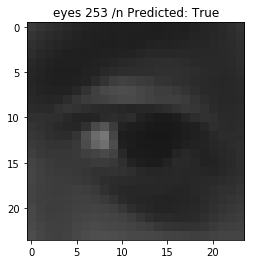

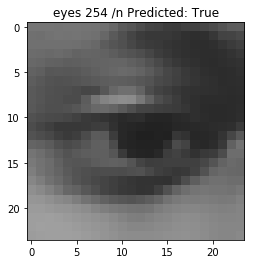

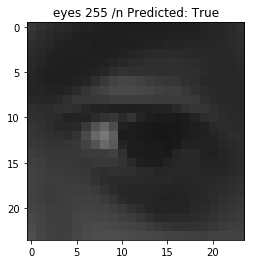

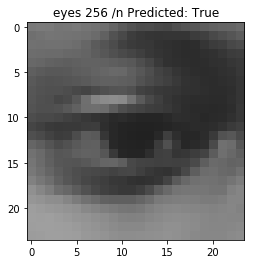

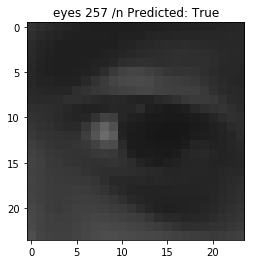

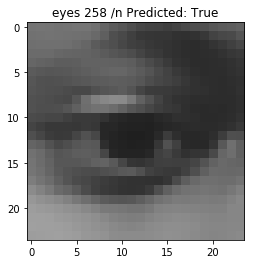

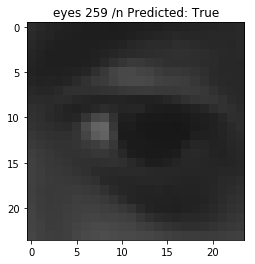

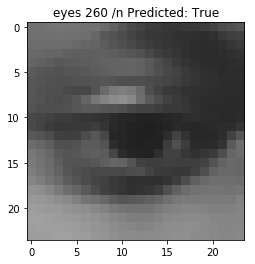

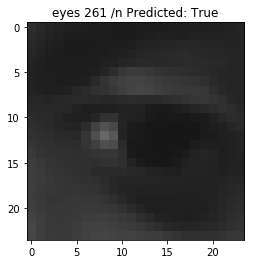

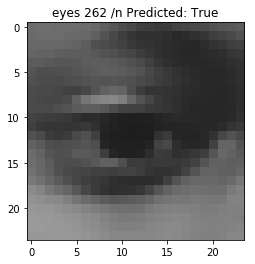

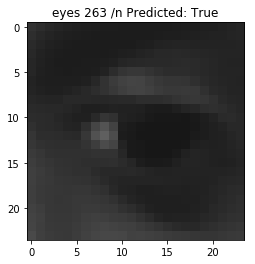

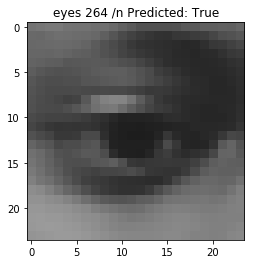

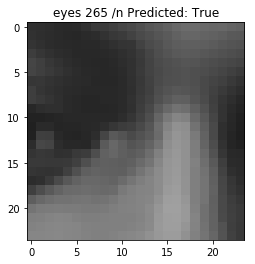

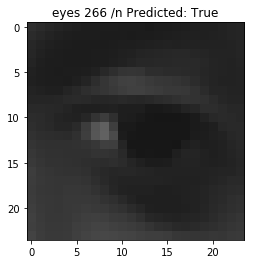

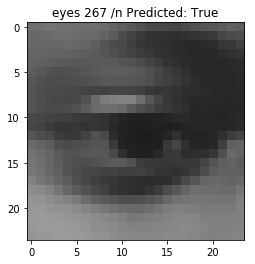

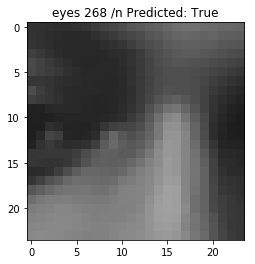

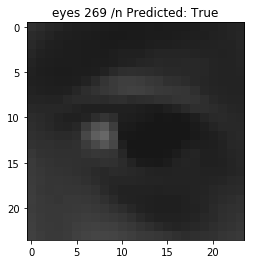

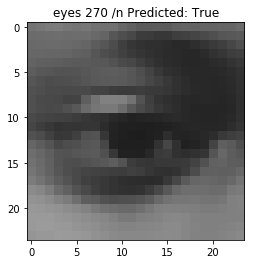

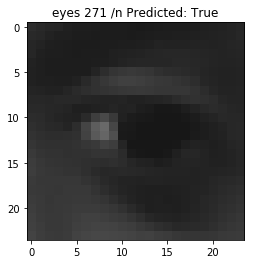

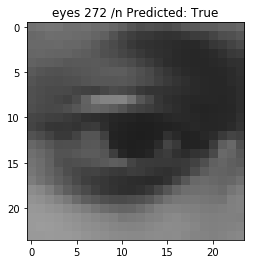

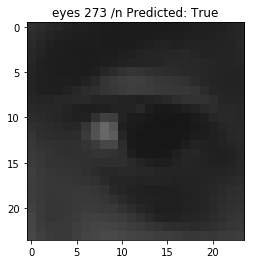

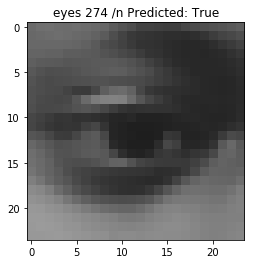

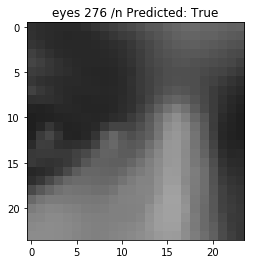

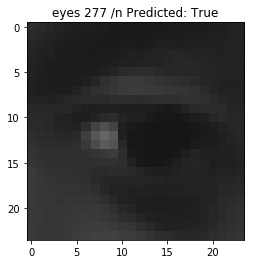

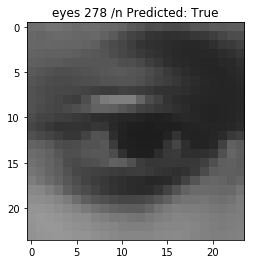

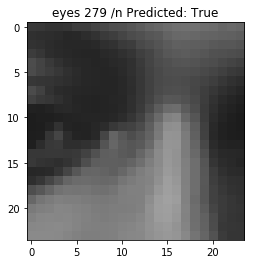

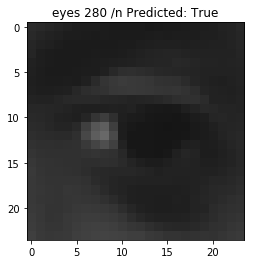

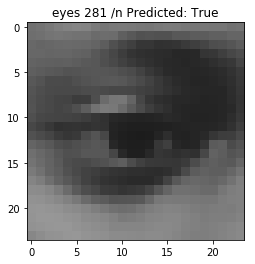

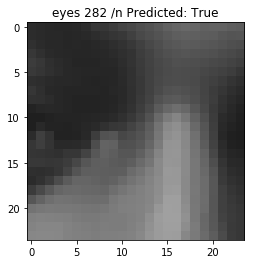

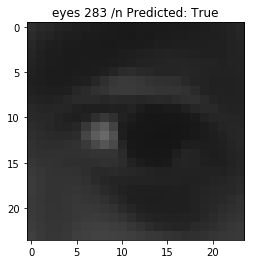

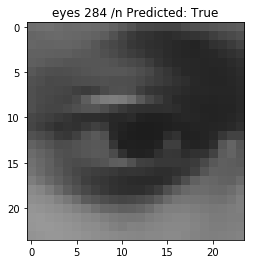

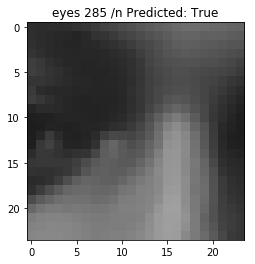

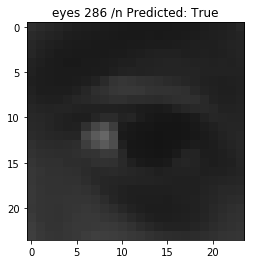

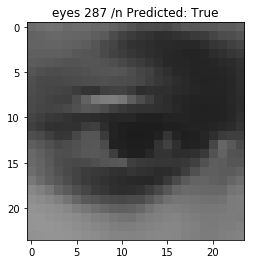

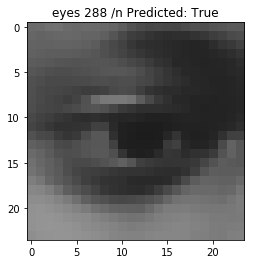

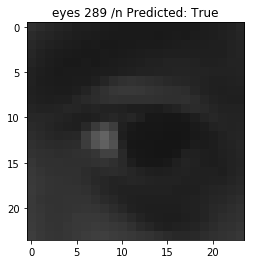

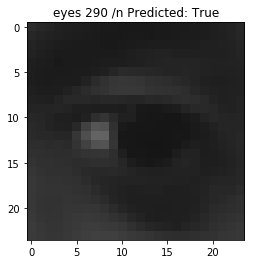

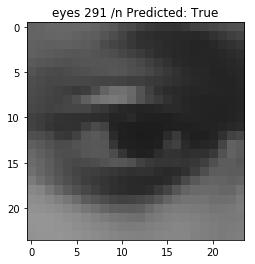

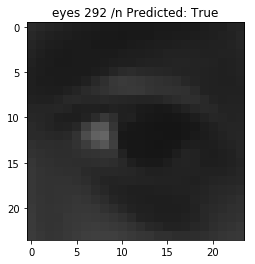

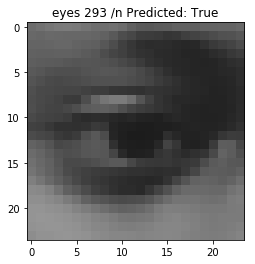

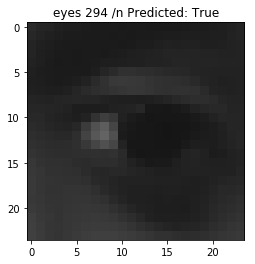

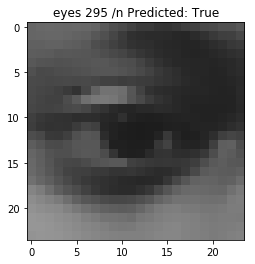

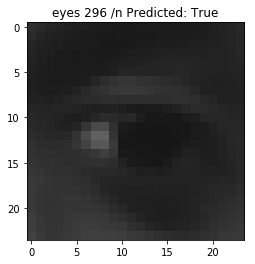

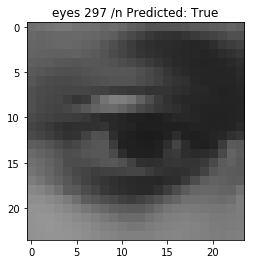

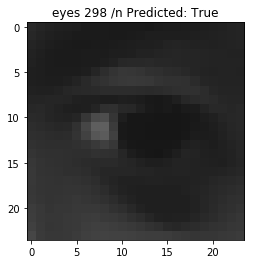

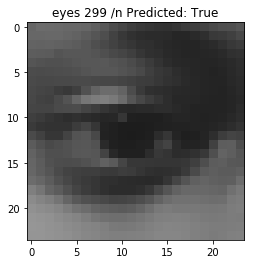

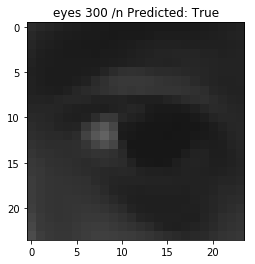

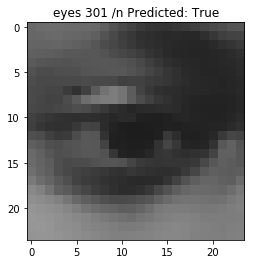

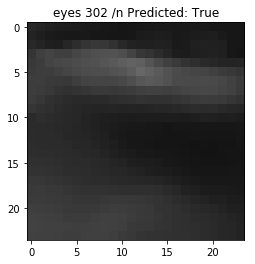

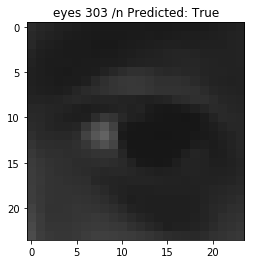

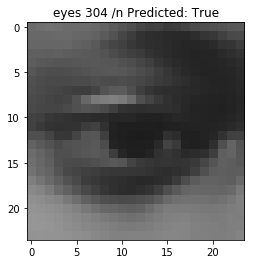

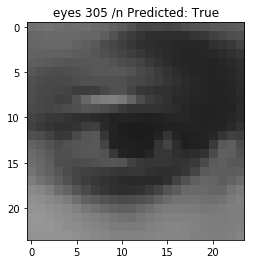

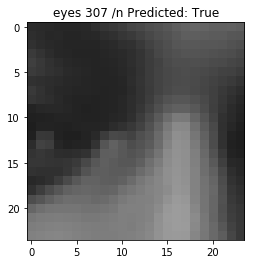

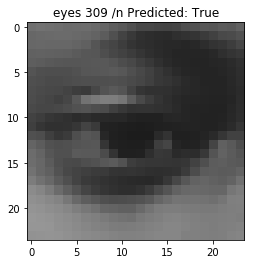

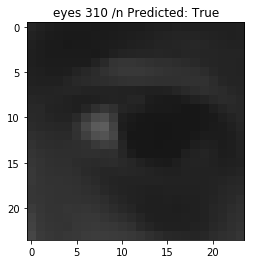

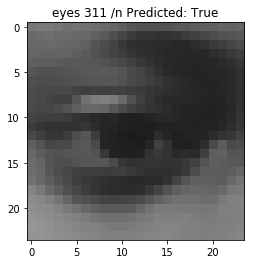

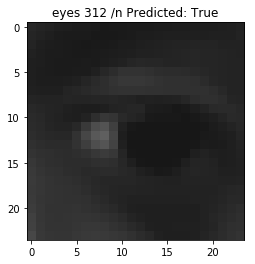

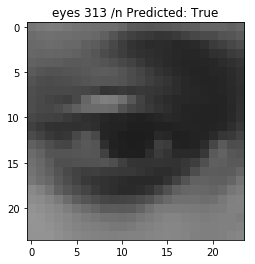

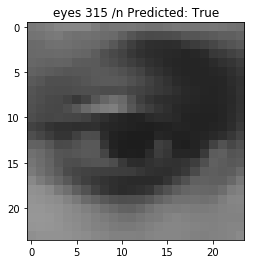

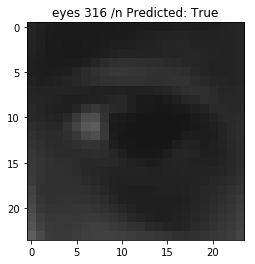

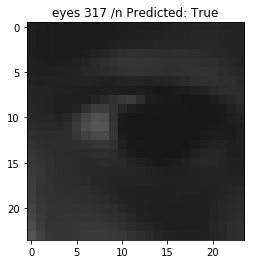

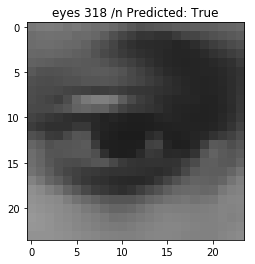

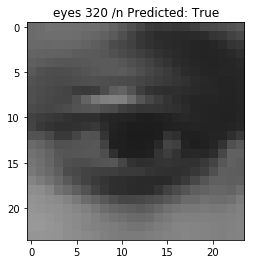

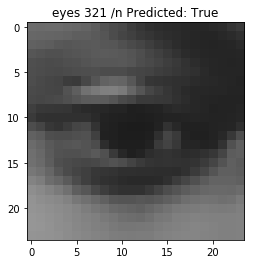

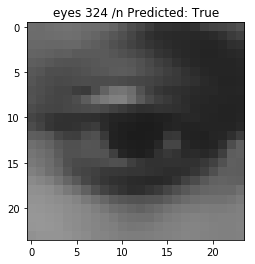

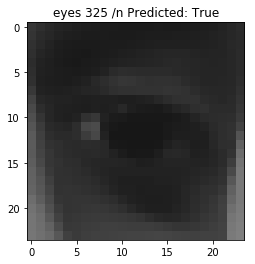

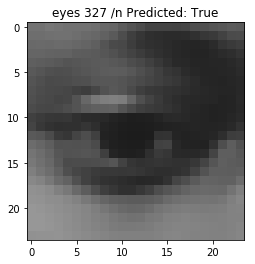

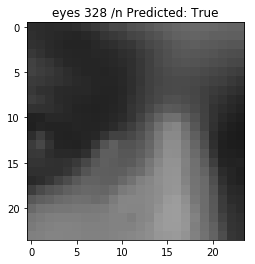

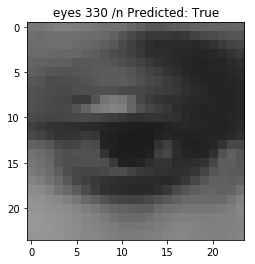

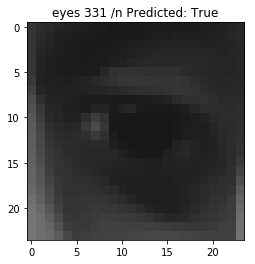

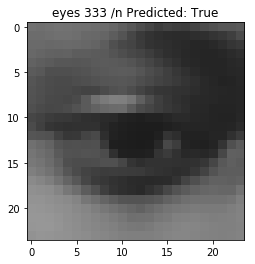

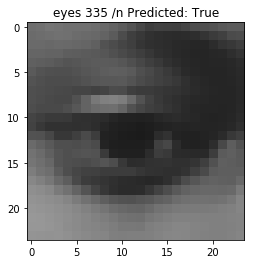

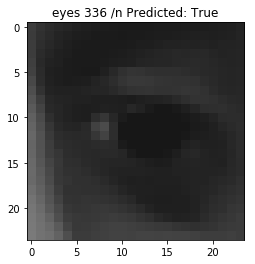

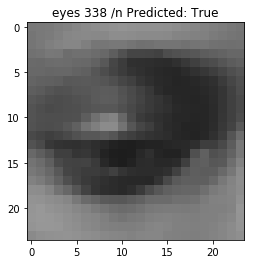

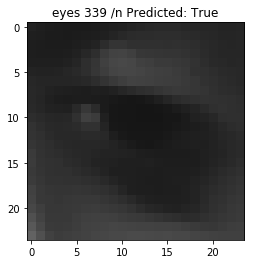

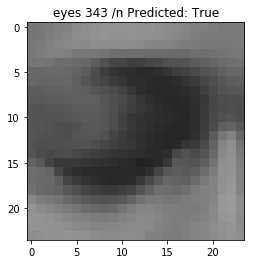

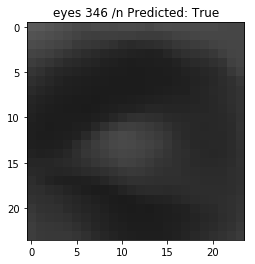

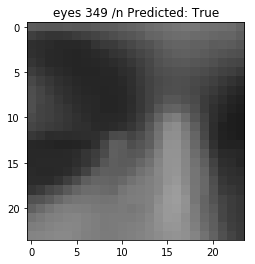

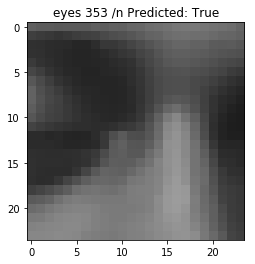

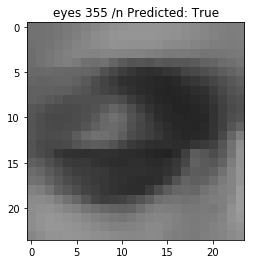

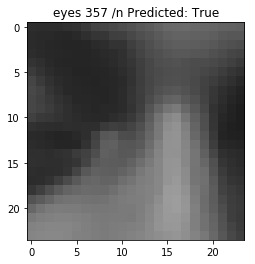

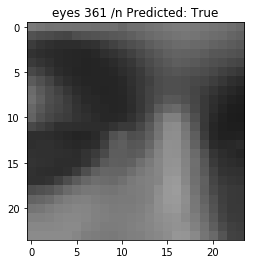

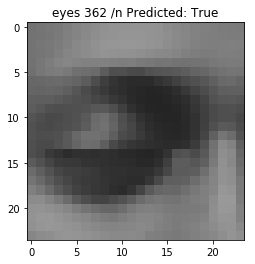

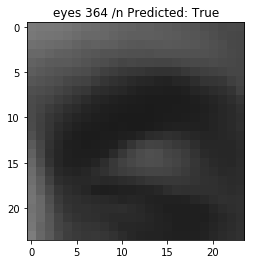

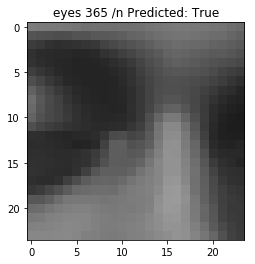

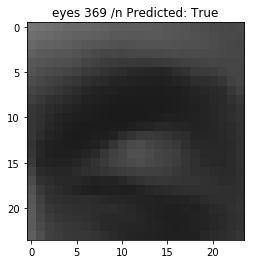

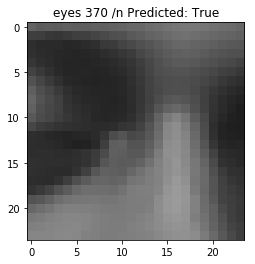

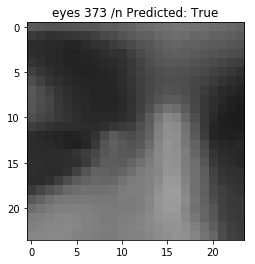

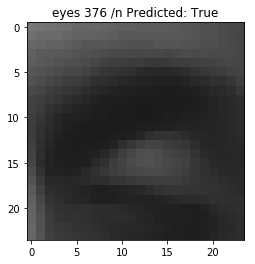

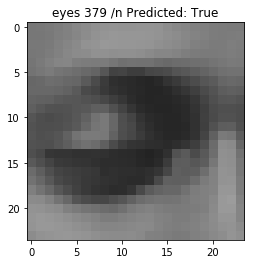

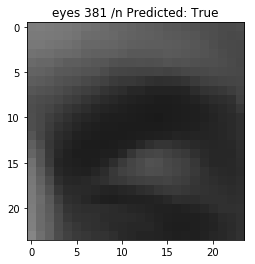

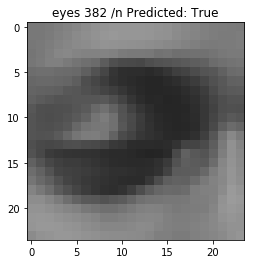

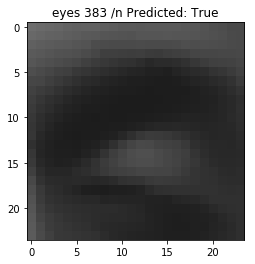

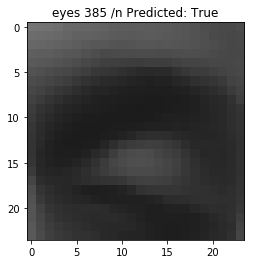

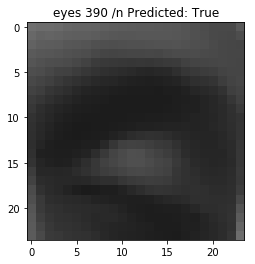

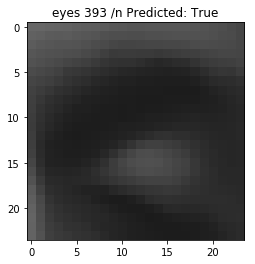

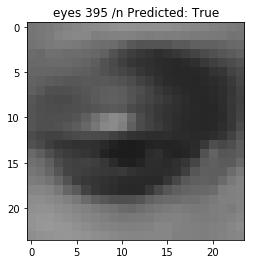

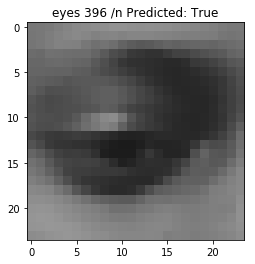

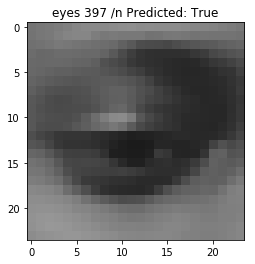

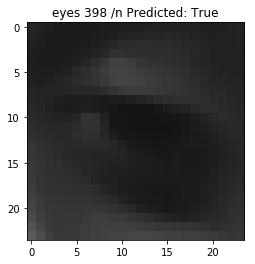

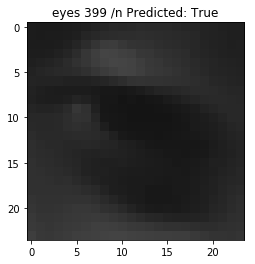

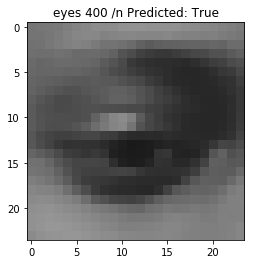

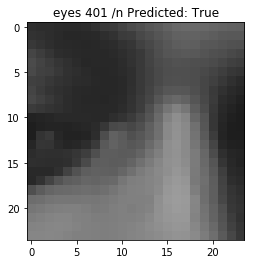

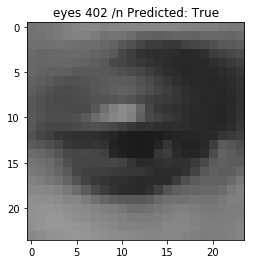

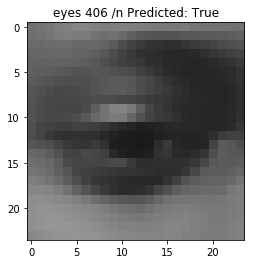

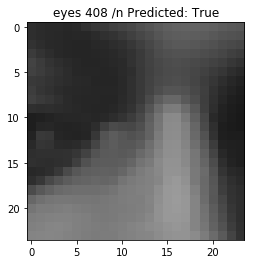

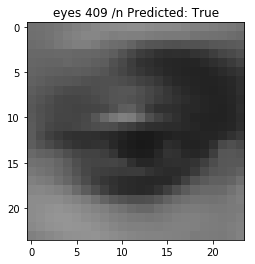

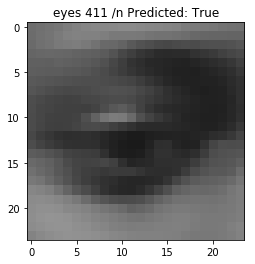

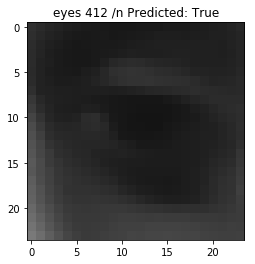

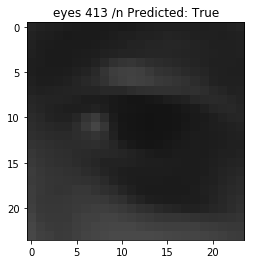

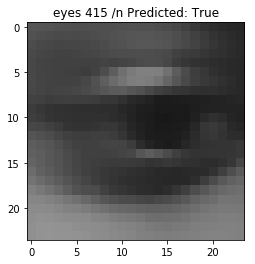

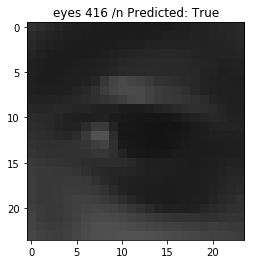

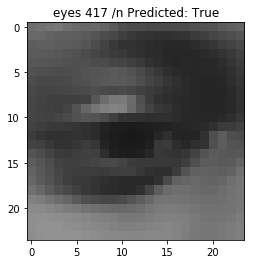

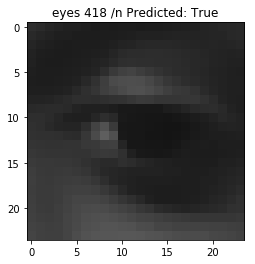

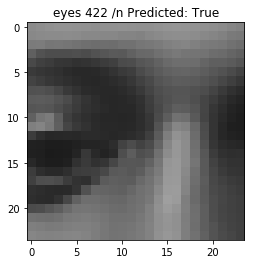

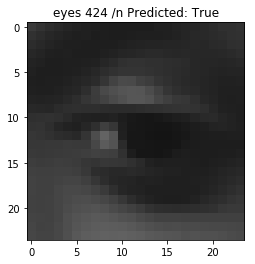

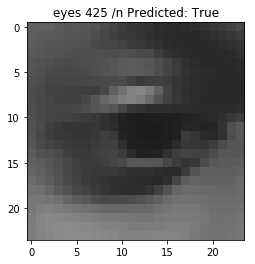

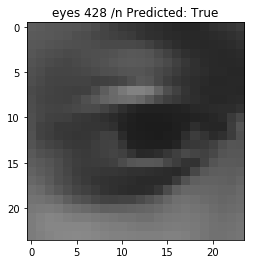

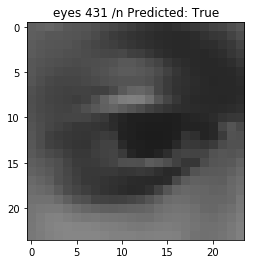

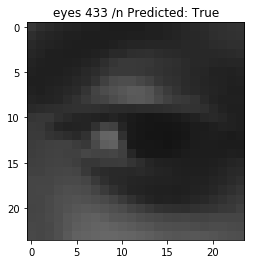

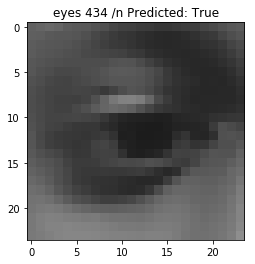

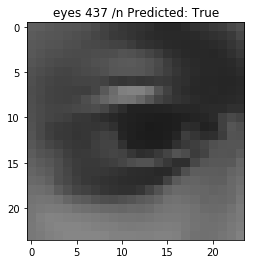

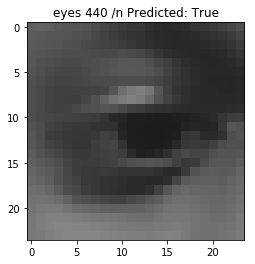

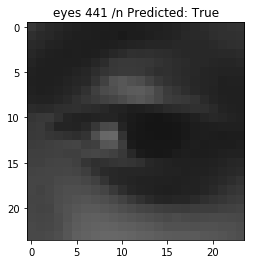

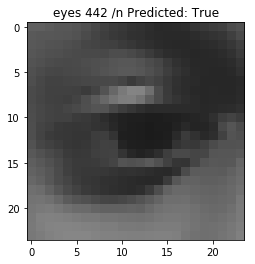

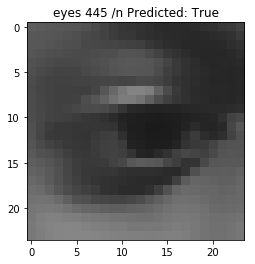

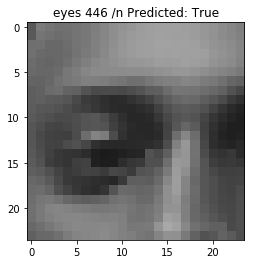

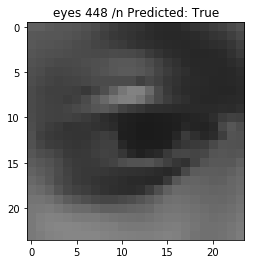

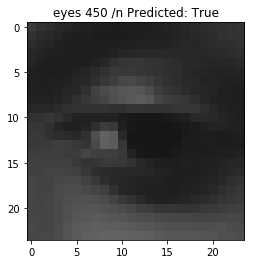

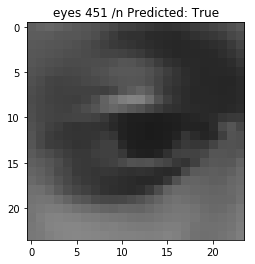

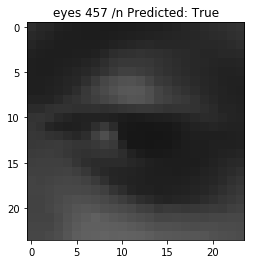

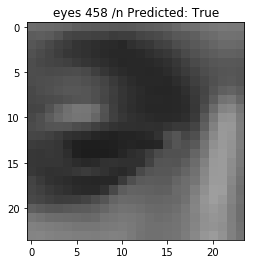

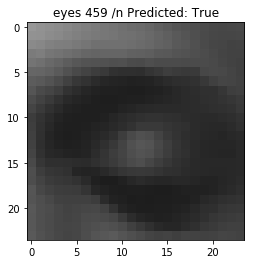

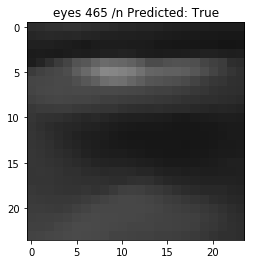

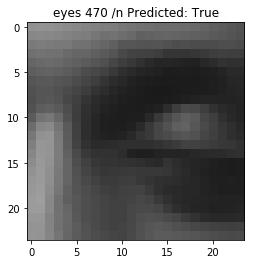

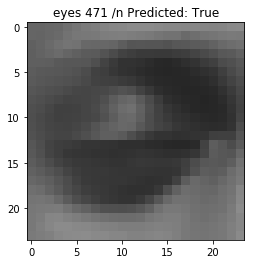

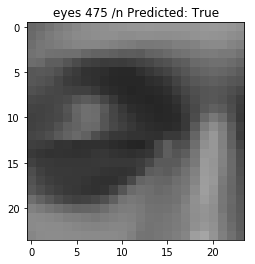

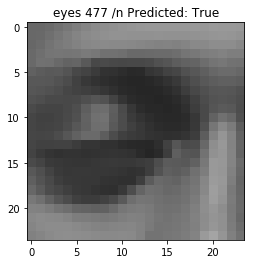

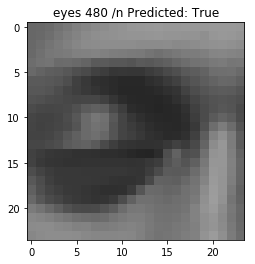

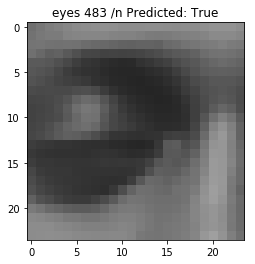

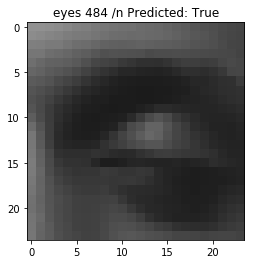

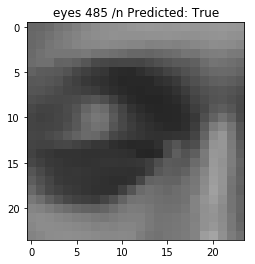

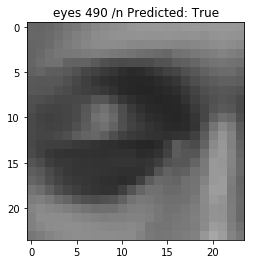

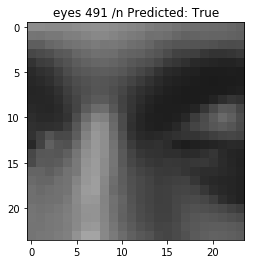

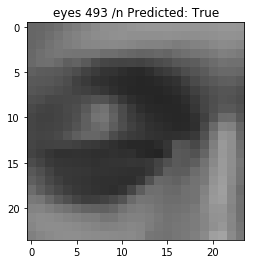

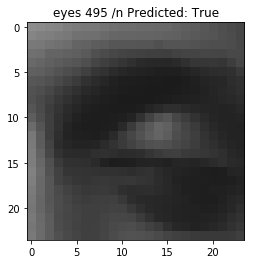

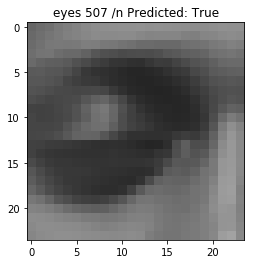

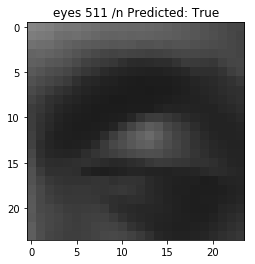

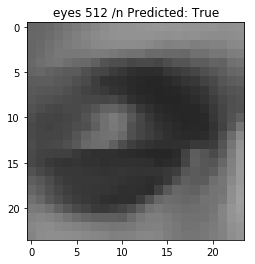

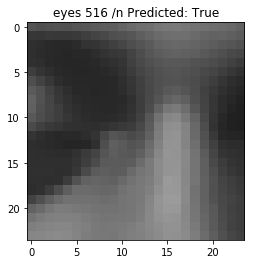

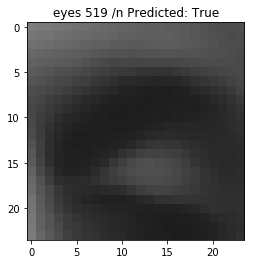

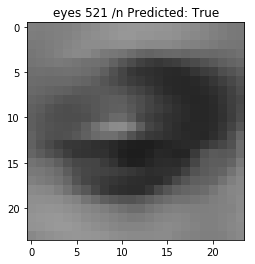

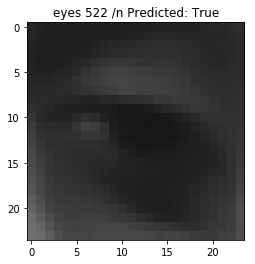

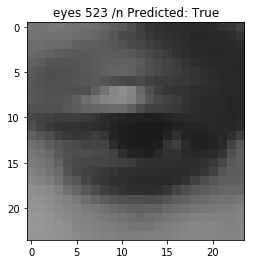

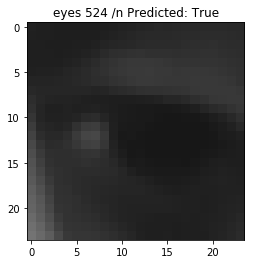

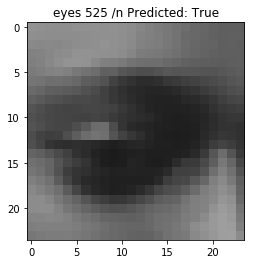

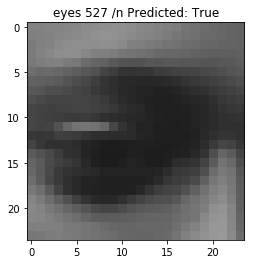

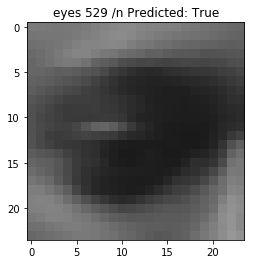

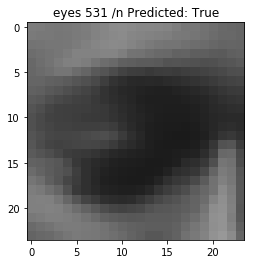

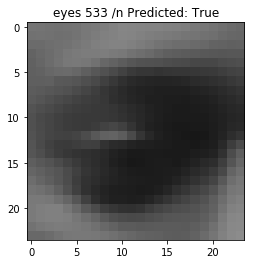

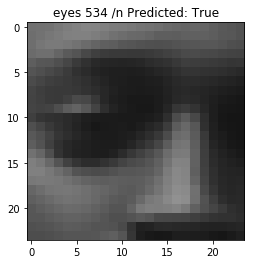

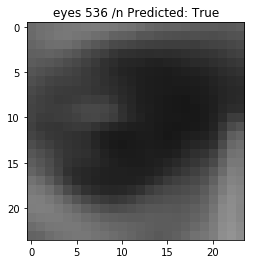

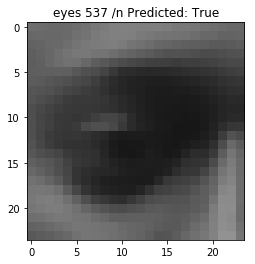

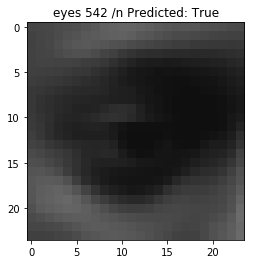

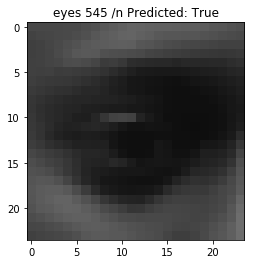

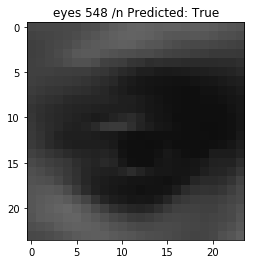

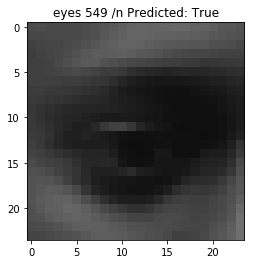

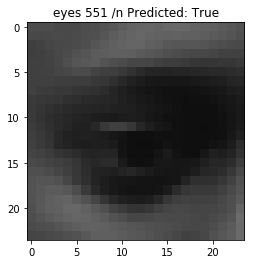

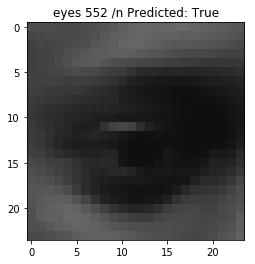

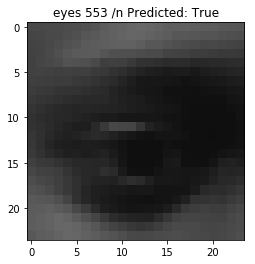

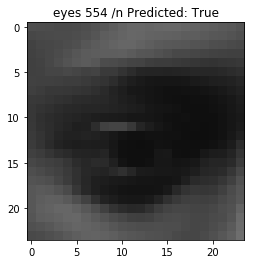

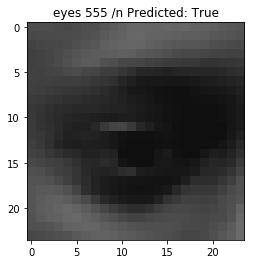

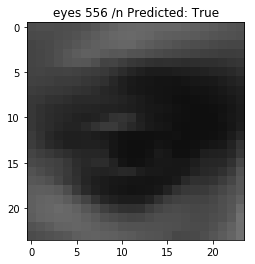

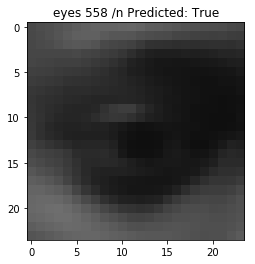

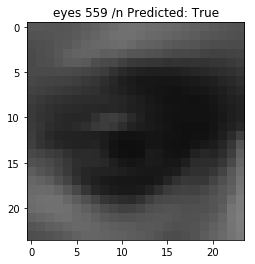

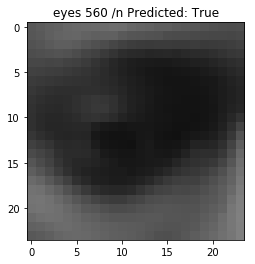

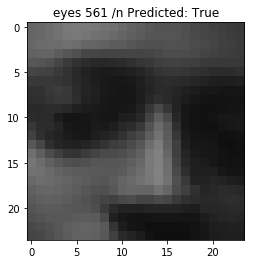

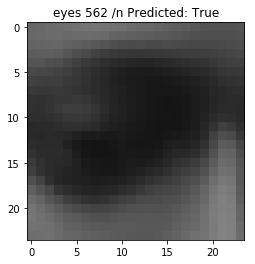

In [26]:
o = 0
for i in eyes:
    show = cv.cvtColor(i, cv.COLOR_GRAY2RGB)
    model.predict(i.reshape(1,-1).T/255)
    if model.predictions[0][0] == True:
        plt.title('eyes {} /n Predicted: {}'.format(o, model.predictions[0][0]))
        plt.imshow(show)
        plt.show()
    o+=1

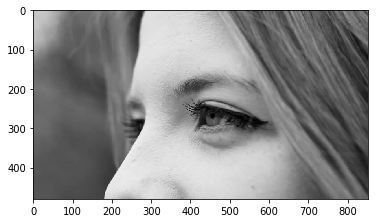

In [35]:
im = cv.imread('1.jpg', 0)
im = cv.cvtColor(im, cv.COLOR_GRAY2RGB)
plt.imshow(im)
plt.show()